# **Chapter 2: Operating-System Structures**

#### **Introduction to Operating System Services**

An operating system (OS) is the fundamental software that provides an environment for programs to run. Think of it as the manager of your computer's hardware, making it easier and safer for you and your programs to use the CPU, memory, disks, and other devices.

Since operating systems can be built in many different ways, having clear design goals is crucial before starting to build one. These goals guide the choice of algorithms and strategies used inside the OS.

We can look at an operating system from three main angles:
1.  **Services it provides:** What does it do for users and programs?
2.  **Interface it offers:** How do users and programmers interact with it?
3.  **Internal components:** What are its pieces and how do they connect?

This chapter will explore all three of these viewpoints.

## **2.1 Operating-System Services**

#### **Introduction: The OS as a Service Provider**

An operating system's core job is to provide a stable and functional environment where programs can run. It achieves this by offering a set of essential services to both the programs themselves and the users who run them. While the exact list of services can vary between different operating systems (like Windows, Linux, or macOS), we can group them into common categories.

**Go to Figure 2.1:** This figure gives a visual overview of these services. It shows how user requests, made via a GUI or command line, are translated into system calls that interact with the operating system. The OS then uses the hardware to provide these services. The services can be broadly divided into those that help the user and those that ensure the system itself runs efficiently.


 <br> 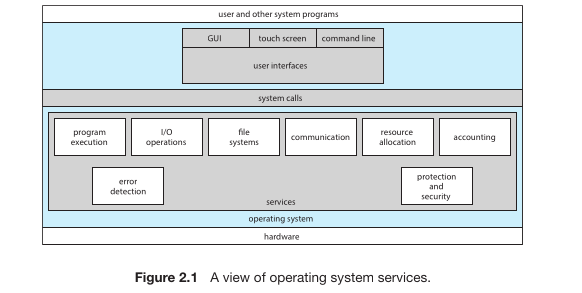 <br>

### **Part 1: Services for the User**

These are the functions that you, as a user or programmer, interact with directly or indirectly to get your work done.

#### **1. User Interface (UI)**
This is how you interact with the OS. There are three primary types:
*   **Graphical User Interface (GUI):** The modern, visual interface most people are familiar with. It uses windows, icons, menus, and a pointer (like a mouse). You click to direct input/output and make selections.
*   **Touch-Screen Interface:** A variant of the GUI common on mobile devices. You use gestures like sliding and tapping on the screen to interact.
*   **Command-Line Interface (CLI):** A text-based interface where you type specific commands with options. It's powerful for automation and precise control. Many systems offer a choice between these interfaces.

#### **2. Program Execution**
The OS must be able to load a program's instructions into main memory and start its execution. This involves the CPU fetching and executing the instructions. Just as importantly, the OS must be able to clean up after a program ends, whether it finishes normally or crashes abnormally (e.g., due to an error).

#### **3. I/O Operations**
Running programs almost always need to perform Input/Output operations, like reading from a file or printing to a printer. For efficiency and, crucially, for **protection**, user programs are not allowed to directly control I/O devices. Imagine if any program could directly read from your disk; malware would be trivial to write! Therefore, the OS provides a safe, controlled means to perform all I/O.

#### **4. File-System Manipulation**
Programs need to work with data stored long-term. The OS manages the file system, allowing programs to:
*   Create and delete files and directories.
*   Search for files.
*   Read from and write to files.
*   List file information (metadata).
*   Manage permissions to control which users can access which files.

#### **5. Communications**
Often, one process needs to talk to another. This could be between two processes on the same computer or between processes on different computers connected by a network. The OS provides mechanisms for this communication, primarily through two methods:
*   **Shared Memory:** A block of memory is created that multiple processes can both read from and write to.
*   **Message Passing:** Processes send and receive discrete packets of information (messages) through the OS, which handles the transfer.

#### **6. Error Detection**
The OS must be constantly vigilant for errors. These can occur in:
*   **Hardware:** Memory errors, power failure.
*   **I/O Devices:** Network connection failure, printer out of paper.
*   **User Program:** Arithmetic overflow, attempting to access an illegal memory address.
The OS must detect these errors and take appropriate action, which could be terminating the offending program, retrying the operation, or in severe cases, halting the entire system to prevent corruption.

---

### **Part 2: Services for Ensuring Efficient System Operation**

These functions operate behind the scenes. The user doesn't directly invoke them, but they are critical for the stability, security, and performance of the entire system, especially when multiple processes are running.

#### **1. Resource Allocation**
When multiple programs or jobs are running concurrently, they must share the finite resources of the computer. The OS acts as a resource manager, allocating resources like:
*   **CPU Time:** Using CPU-scheduling algorithms to decide which process runs next.
*   **Main Memory:** Deciding how much memory to give to each process.
*   **File Storage:** Managing disk space.
*   **I/O Devices:** Allocating devices like printers and USB drives.

#### **2. Logging (Accounting)**
The OS keeps track of which users and programs use how many and what types of resources. This data can be used for:
*   **Billing:** In large, shared systems where users are charged for their usage.
*   **Usage Statistics:** System administrators use this data to analyze performance, spot trends, and reconfigure the system for better efficiency.

#### **3. Protection and Security**
In a multi-user or networked environment, it is vital to control access to information and prevent processes from interfering with each other or the OS itself.
*   **Protection:** This deals with **internal** control. It ensures that each process can only access the resources (memory, files, CPU) that it is authorized to use. This prevents a buggy or malicious program from crashing the entire system.
*   **Security:** This defends against **external** threats. It starts with **authentication** (like requiring a password to log in) and extends to securing network connections and defending against unauthorized access attempts from outside the system. The text makes a key point: security must be comprehensive. A single weak point, like a poor password or an unpatched network service, can compromise the entire system, just as a chain is only as strong as its weakest link.

## **2.2 User and Operating-System Interface**

An operating system provides ways for users to tell it what to do. We will now explore the two main categories of user interfaces in more detail: the Command-Line Interface and the Graphical User Interface.

---

### **2.2.1 Command Interpreters (Shells)**

Think of the command interpreter as a bridge between you and the operating system's core. It's a special program that reads and carries out your commands.

*   On systems like Linux, UNIX, and Windows, this program starts up as soon as you log in.
*   When you have a choice between different command interpreters, they are often called **shells**. For example, on Linux and UNIX, you can choose from shells like the **C shell**, **Bourne-Again shell (bash)**, and **Korn shell**. They all do the same basic job, so the choice is about personal preference for features and syntax.

**Go to Figure 2.2:** This figure shows the **Bourne-Again shell (bash)** in action on a macOS terminal window. You type a command at the prompt, and the shell executes it.
<br> 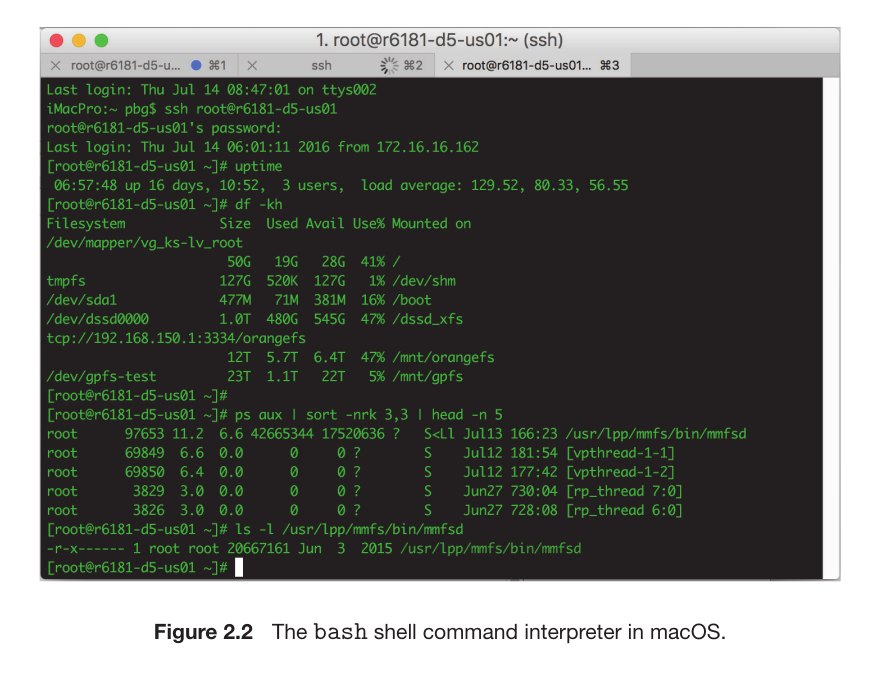 <br>

#### **The Shell's Main Job**
The primary function of a shell is simple:
1.  Get the next command from the user.
2.  Execute that command.

Many of these commands are for file manipulation (create, delete, list, copy, etc.). How the shell actually executes these commands can be implemented in one of two ways:

#### **Two Ways to Implement Commands**

**1. The Built-in Command Approach**
*   In this method, the command interpreter (the shell program itself) contains the actual code to perform the command.
*   For example, when you type a `delete` command, the shell has a specific section of its own code that it runs to handle file deletion. This code then makes the necessary system call to the OS.
*   **Disadvantage:** The shell program's size is directly tied to the number of commands it supports. Adding a new command requires modifying and re-releasing the shell itself.

**2. The System Program Approach (Used by UNIX/Linux)**
*   This is a more modular and powerful approach. Here, the shell itself *does not* contain the code for commands like `ls` or `rm`.
*   Instead, the shell's job is to find a program file with the same name as the command and execute it.
*   **Example:** When you type `rm file.txt`, the shell:
    1.  Searches for a file named `rm` in a set of predefined directories (known as the `PATH`).
    2.  Loads this `rm` file into memory.
    3.  Executes it, passing the argument `file.txt` to it.
*   The actual logic for deleting the file is completely defined within the separate `rm` program.
*   **Advantage:** This system is highly extensible. To add a new command, you just need to create a new program and place it in the right directory. The shell can remain small and simple, and it doesn't need to be changed to support new commands.

### **2.2.2 Graphical User Interface (GUI)**

The second primary strategy for interacting with an operating system is through a **Graphical User Interface (GUI)**. This is a visual, user-friendly alternative to the text-based command line.

#### **Core Concepts of a GUI**

Instead of typing commands, users interact with a **mouse-based window-and-menu system** built around a **desktop metaphor**. Think of your screen as a physical desk. On it, you see:

*   **Icons:** Small images that represent programs, files, directories (called **folders** in a GUI), and system functions.
*   **Windows:** Rectangular areas that display the contents of an application or a folder.
*   **Menus:** Lists of commands that appear when you click on a title or button.

You control a pointer on the screen using a mouse (or touchpad). By moving the pointer and clicking the mouse buttons, you can:
*   **Invoke a program** by double-clicking its icon.
*   **Select a file or folder** by clicking on it.
*   **Pull down a menu** to see and select from a list of commands.

#### **Historical Context**

The GUI has a rich history:
*   It was pioneered in the early 1970s at the **Xerox PARC** research facility.
*   The first computer to feature a GUI was the **Xerox Alto** in 1973.
*   GUIs became mainstream in the 1980s with the **Apple Macintosh**.
*   Microsoft introduced its GUI as **Windows**, initially as an addition to the MS-DOS operating system.

#### **GUIs in the UNIX/Linux World**

While UNIX systems were traditionally command-line dominated, they have powerful GUI options available, largely developed by the open-source community. Two major examples are:
*   **KDE (K Desktop Environment)**
*   **GNOME (GNU Network Object Model Environment)**

These desktop environments run on Linux and other UNIX-like systems and are available under open-source licenses, meaning their source code can be freely used, modified, and distributed.

---

### **2.2.3 Touch-Screen Interface**

For mobile devices like smartphones and tablets, using a mouse or typing long commands is impractical. These devices primarily use a **Touch-Screen Interface**.

#### **How it Works**

Users interact directly with the screen using their fingers. Interaction is based on **gestures**, such as:
*   **Pressing (Tapping):** To select an item, like an app icon or a button.
*   **Swiping:** To scroll through a page, switch between screens, or reveal menus.
*   **Pinching and Spreading:** To zoom in and out.

While early smartphones had physical keyboards, most modern devices simulate a keyboard directly on the touch screen when text input is needed.

**Go to Figure 2.3:** This figure shows the touch-screen interface of an Apple iPhone, illustrating how apps and functions are controlled via direct touch interaction.

### **2.2.4 Choice of Interface**

The decision to use a command-line interface (CLI) or a graphical user interface (GUI) is largely a matter of personal preference and the specific task at hand. Different interfaces offer different advantages for different types of users.

#### **Who Uses the Command-Line Interface (CLI) and Why?**

The primary users of the command line are **system administrators** and **power users**. For them, the CLI is often more efficient because it provides:

*   **Faster Access:** It can be quicker to type a command than to navigate through multiple menus with a mouse.
*   **Access to More Functions:** On some systems, advanced or less common system functions are *only* available via the command line.
*   **Powerful Automation:** This is a key advantage. The CLI is highly programmable. Repetitive tasks involving multiple commands can be saved in a text file called a **shell script**. This script can then be run as a program. The command-line interpreter reads and executes the commands in the script one by one. This use of scripts is extremely common on UNIX and Linux systems.

#### **Who Uses the Graphical User Interface (GUI) and Why?**

The vast majority of users, especially on Windows and macOS, primarily use the GUI. It is more intuitive and visually oriented.

*   **Windows:** Most users rely entirely on the Windows GUI. Modern Windows systems provide a standard GUI for desktops and a touch-screen variant for tablets.
*   **macOS:** The history of Macintosh offers an interesting case study. Historically, Mac OS only provided a GUI. However, with the modern **macOS** (which is built on a UNIX kernel), the system now provides both the **Aqua GUI** and a full, powerful **command-line interface** (the Terminal app), giving users the best of both worlds.

**Go to Figure 2.4:** This figure shows the macOS GUI, known as Aqua, with its characteristic dock and menu bar.

#### **Mobile Systems and Their Interface**

On mobile systems like iOS and Android, the **touch-screen interface is dominant**. While command-line apps exist, they are used very rarely. Almost all user interaction is done through gestures on the touch screen.

#### **A Key Distinction: The User Interface vs. The Operating System Core**

It is crucial to understand that the user interface (whether CLI, GUI, or touch) is **separate from the core structure of the operating system**. The design of a user-friendly interface is a distinct challenge from solving the fundamental problems of operating system design, such as process scheduling or memory management.

From the operating system's perspective, a user clicking an icon in a GUI and a user running a script from the command line are ultimately doing the same thing: requesting a service. The OS does not fundamentally distinguish between a "user program" and a "system program"; it provides services to all programs that request them properly. This book focuses on these core services and how the OS provides them.

## **2.3 System Calls**

#### **Introduction: The Programmer's Gateway to the OS**

System calls are the fundamental interface between a running application program and the operating system. They are the mechanism that a program uses to request a service from the kernel, such as reading a file or creating a process.

These calls are typically implemented as functions written in high-level languages like C and C++, which makes them accessible to application programmers. However, for tasks that require the absolute highest performance or direct hardware manipulation, they may need to be implemented using assembly language instructions.

---

### **2.3.1 Example: A File Copy Program**

To understand how system calls are used, let's trace through a simple program that reads data from one file and copies it to another. This example will show that even a simple task requires a sequence of many system calls.

**Go to Figure 2.5:** This flowchart provides an excellent visual guide for the sequence of system calls described below.
<br> 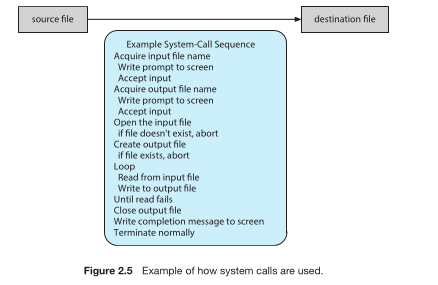 <br>
#### **Step 1: Getting the File Names**
The program first needs to know which file to read from (`in.txt`) and which to write to (`out.txt`). There are two common ways to do this, both involving system calls:

1.  **Command-Line Arguments:** The file names are passed as arguments when the program is run (e.g., `cp in.txt out.txt`). The shell has already handled the system calls to parse this command.
2.  **Interactive Input:** The program interactively asks the user for the names. This requires:
    *   A system call to **write** a prompting message to the screen.
    *   A system call to **read** the user's input from the keyboard.
    *   In a GUI, this involves many more I/O system calls to display windows, handle mouse clicks, etc.

#### **Step 2: Setting Up the Files**
Once the program has the file names, it must prepare the files for operation:

*   **Open the input file:** A system call to `open("in.txt")`.
    *   **Error Handling:** This call can fail. The OS returns an error if the file doesn't exist or if the program doesn't have permission to read it. The program must then make system calls to **write** an error message and **terminate abnormally**.
*   **Create and open the output file:** A system call to `creat("out.txt")` or `open()` with specific flags.
    *   **Error Handling:** If the output file already exists, the program must decide what to do. It might:
        *   **Abort** the operation (a system call).
        *   **Delete** the existing file (a system call) and then create a new one (another system call).
        *   Ask the user what to do (using more **write** and **read** system calls).

#### **Step 3: The Copy Loop**
With both files successfully opened, the program enters the main copy loop:

*   **Read from input:** A system call to `read()` a chunk of data from the input file into memory.
    *   This call returns status information. It will eventually indicate when the **end of the file** is reached. It could also report a hardware error.
*   **Write to output:** A system call to `write()` that same chunk of data from memory to the output file.
    *   This call can also fail, for example, if the disk runs out of space.

This read-write cycle repeats until the entire file has been copied.

#### **Step 4: Cleanup and Termination**
After the loop finishes, the program must clean up and exit cleanly:

*   **Close both files:** System calls to `close()` the input and output files. This tells the OS that the program is done with them, ensuring all data is physically written to disk.
*   **Notify the user:** A system call to **write** a "copy complete" message to the screen.
*   **Exit:** A final system call to **terminate normally**.

As you can see, a seemingly simple command like `cp` is built upon a long and carefully managed sequence of system calls, each one a request for the operating system to perform a specific, protected action.

### **2.3.2 Application Programming Interface (API)**

#### **Bridging the Gap for Programmers**

As we saw with the file copy example, programs rely heavily on the OS. However, most application programmers do not work with raw system calls directly. Instead, they use an **Application Programming Interface (API)**.

An API is a set of well-defined functions, including their parameters and return values, that a programmer can use to build applications. Think of it as a standard contract between the programmer and the operating system.

**Common APIs include:**
*   **Windows API:** For the Windows operating system.
*   **POSIX API:** For POSIX-based systems like UNIX, Linux, and macOS.
*   **Java API:** For programs that run on the Java Virtual Machine (JVM).

To use these functions, a programmer includes a **library** provided by the OS, such as `libc` for C programs on UNIX/Linux.

#### **The Relationship Between an API and System Calls**

The functions in an API are typically **wrappers** that invoke the actual system calls.

*   **Example:** A Windows programmer calls the API function `CreateProcess()`. Behind the scenes, this function invokes the actual system call in the Windows kernel, which might be called `NTCreateProcess()`.

**Why use an API instead of direct system calls?**
1.  **Portability:** Code written using a standard API (like POSIX) is more likely to compile and run on different systems that support the same API. Direct system calls are often unique to a specific OS.
2.  **Ease of Use:** APIs are generally simpler and more convenient for programmers than the often more complex and detailed raw system calls.

---

#### **Example: The `read()` API in UNIX/Linux**

Let's examine a real-world API. The command `man read` on a UNIX system reveals the API for the `read()` function:

```c
#include <unistd.h>
ssize_t read(int fd, void *buf, size_t count);
```

*   **Return Value:** `ssize_t` - The number of bytes read. `0` means end-of-file, `-1` means an error occurred.
*   **Parameters:**
    *   `int fd`: The file descriptor (a number representing the open file).
    *   `void *buf`: A pointer to the memory buffer where the read data should be stored.
    *   `size_t count`: The maximum number of bytes to read.

This is the clean, standard interface a programmer works with.

---

#### **The System-Call Interface: The Real Gateway**

The **run-time environment (RTE)**, which includes libraries and loaders, provides a crucial layer called the **system-call interface**.

**How it works (Refer to Figure 2.6):**
1.  A user application calls an API function like `open()`.
2.  The system-call interface intercepts this call.
3.  Each system call has a unique number. The interface uses this number to look up the address of the corresponding kernel function in a table.
4.  The interface then triggers a switch from **user mode** to **kernel mode** and invokes the actual `open()` system call code within the operating system.
5.  After the system call completes, the result is returned to the application.

The programmer doesn't need to know any of these implementation details; they only need to use the API correctly.

---
<br> 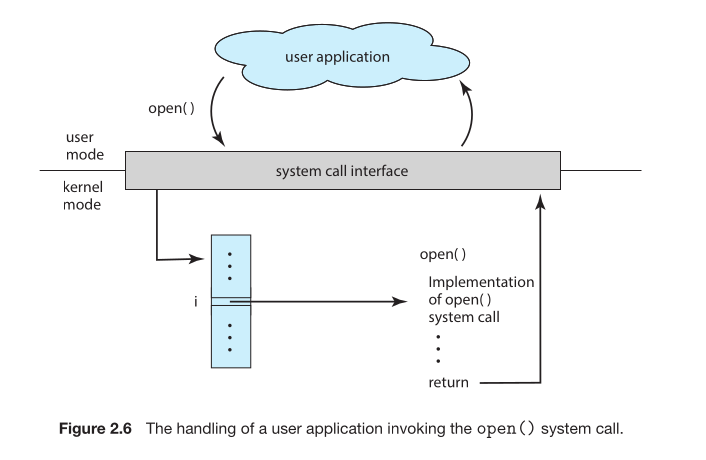 <br>
#### **Passing Parameters to System Calls**

System calls often require parameters (e.g., which file to open). Since a system call involves a privileged switch to kernel mode, these parameters must be passed safely. There are three common methods:

1.  **Pass in Registers:** The simplest method. Parameters are placed in the CPU's registers.
2.  **Pass in a Block (Table):** If there are more parameters than available registers, they are stored in a block of memory. The *address* of this block is then passed in a single register.
    *   **Linux Example:** Linux uses registers if there are 5 or fewer parameters; if there are more, it uses the block method.
3.  **Pass on the Stack:** Parameters are pushed onto the program's stack. The operating system then pops them off the stack. Some operating systems prefer the block or stack method because those approaches do not limit the
number or length of parameters being passed.

**Go to Figure 2.7:** This figure illustrates the block method. The user program places parameters in a table in memory (X) and then passes the address of that table in a register. The operating system then knows to look in that memory block to retrieve all the parameters for the system call.
<br> 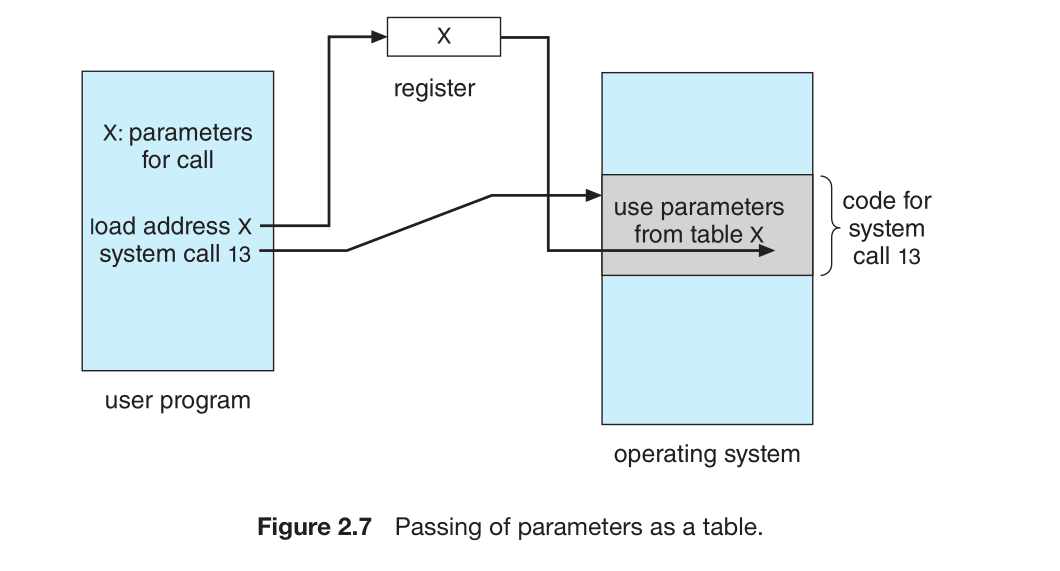 <br>

### **2.3.3 Types of System Calls**

Think of system calls as the official "request lines" that your application programs use to ask the operating system kernel for services. Since the kernel has supreme control over hardware and critical resources, user programs can't do these tasks directly. They must make a system call.

System calls are generally grouped into six major categories. **Figure 2.8** provides a concise summary of these categories and their common calls. We will now explore each one in detail.

<br> 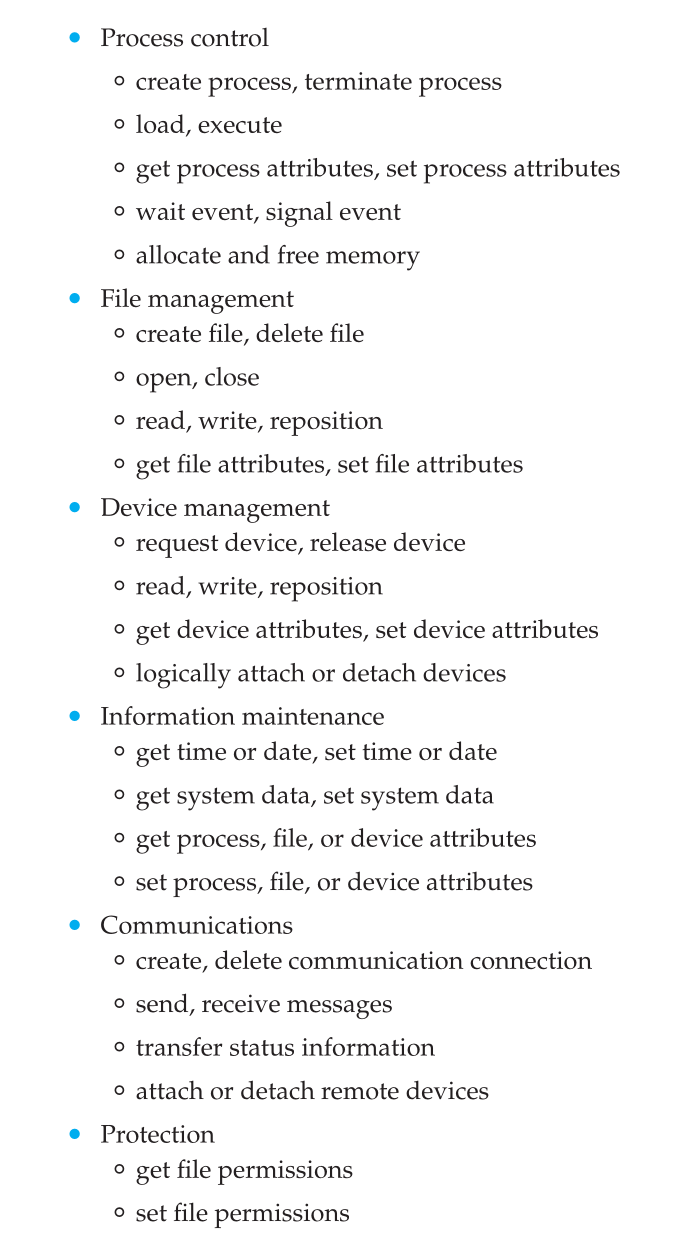 <br>

---

#### **2.3.3.1 Process Control**

This category deals with the management of processes—which are basically programs in execution. If you remember from computer architecture, a process is more than just the code; it's the code, data, and the state of the CPU (registers, program counter, etc.).

**Key System Calls and Their Purposes:**

*   **`end()` and `abort()`:** A process needs ways to stop.
    *   `end()` is for a normal, happy ending.
    *   `abort()` is for when something goes wrong. When this happens, the OS might create a **core dump**—a snapshot of the process's memory at the time of failure—and save it to a log file. A programmer can later use a **debugger** to analyze this dump and find the bug.

*   **Control Transfer:** After a process ends (normally or abnormally), the OS must give control back to the parent process, which is often the **command interpreter** (the shell). In a GUI system, this might mean showing a pop-up error message.
*   **Error Levels:** A program terminating abnormally can specify an **error level** (a numeric code) to indicate the severity or type of error. A normal termination is often defined as error level 0. The shell or a subsequent program can automatically check this error level to decide its next action (e.g., retry the operation, send a notification, or continue).
*   **`load()` and `execute()`:** This is how one program starts another. For example, when you type a command like `ls` in your shell, the shell uses these calls to load and run the `ls` program. A critical question here is: what happens to the original program?
    *   If the original program waits for the new one to finish, we need to save its state.
    *   If they both run at the same time, we have created a new process. This is so common that there is often a dedicated `create_process()` or `fork()` system call.

*   **Process Attributes:** Once you have processes, you need to manage them.
    *   `get_process_attributes()` and `set_process_attributes()` allow you to check and change things like a process's priority or its maximum allowed running time.
    *   `terminate_process()` lets you kill a process you created.

*   **Synchronization (Waiting and Signaling):** Processes often need to coordinate.
    *   A parent process might `wait_event()` for a child process to finish.
    *   The child process then `signal_event()` when it is done.
    *   `wait_time()` puts a process to sleep for a specified period.

*   **Locking for Shared Data:** When multiple processes share data (e.g., a file), we need to prevent them from stepping on each other's toes. The `acquire_lock()` and `release_lock()` system calls create a critical section, ensuring that only one process can access the shared data at a time.


#### **Real-World Examples: From Simple to Complex**

To fully grasp the variations in process control, it's helpful to compare two extremes: a simple single-tasking system and a complex multitasking one.

**1. Single-Tasking System (Arduino)**

Let's consider a simple embedded system like an **Arduino**. It consists of a microcontroller and input sensors (for light, temperature, etc.).

*   **Programming:** You write a program (called a **sketch**) on a PC, compile it, and upload it to the Arduino's flash memory via USB.
*   **The Boot Loader:** A small piece of software called a **boot loader** is responsible for loading your sketch into a specific region of the Arduino's memory.
    *   **Go to Figure 2.9:** This figure illustrates the memory layout, showing where the boot loader and the single user sketch reside.
*   **Execution:** Once loaded, the sketch begins running and continuously waits for the events it's programmed to handle (e.g., if a temperature sensor exceeds a threshold, it starts a fan motor).
*   **Why "Single-Tasking"?** The Arduino can only run **one sketch at a time**. There is no operating system to manage multiple processes. If you load a new sketch, it completely erases and replaces the previous one in memory. The only "user interface" is the physical hardware sensors themselves. Process control here is minimal—just load and run a single program.


<br> 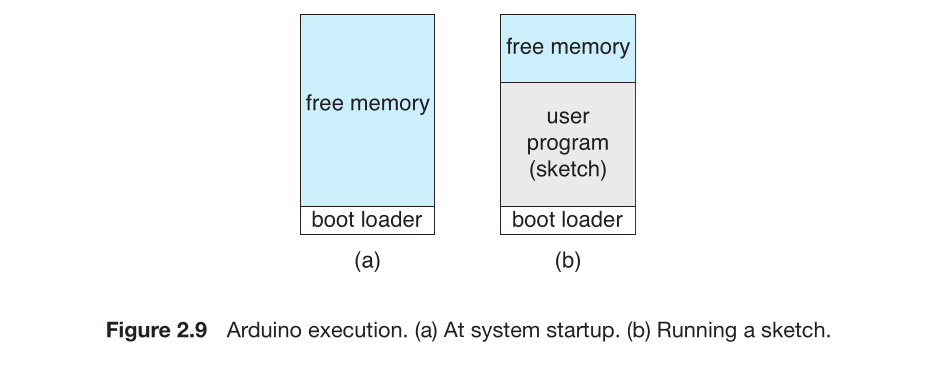 <br>

**2. Multitasking System (FreeBSD/UNIX)** 

Now, let's contrast the Arduino with a modern, general-purpose operating system like **FreeBSD** (a UNIX derivative). These systems are inherently **multitasking**, meaning they can run many processes concurrently.

*   **The Shell and User Commands:** When you log in, a shell (command interpreter) starts. When you tell the shell to run a program (e.g., `gcc myprogram.c`), it doesn't replace the shell. Instead, it uses a sophisticated process control mechanism to create a new process.

*   **The `fork()` and `exec()` Duo:**
    *   **Step 1: `fork()`:** This system call is the first step. The shell uses `fork()` to create a new process that is an *exact duplicate* of itself. This new process is called the **child process**.
    *   **Step 2: `exec()`:** The newly created child process then immediately calls `exec()`. This system call *replaces* the child process's current memory space (which was a copy of the shell) with the code and data of the brand new program you wanted to run (like `gcc`). Now the child process is effectively transformed into the `gcc` program.

*   **Foreground vs. Background Execution:**
    *   After forking, the shell (the **parent process**) has a choice:
        *   **Wait (Foreground):** The shell calls `wait()` to pause its own execution until the child process (`gcc`) finishes. You see the command line "hang" until the program is done.
        *   **Don't Wait (Background):** The shell does *not* call `wait()`. It immediately gives you a new prompt, allowing you to run other commands. The `gcc` process now runs "in the background." Since the shell is still active and using the keyboard, a background process cannot receive input directly from it; its I/O must be done through files or a GUI.

*   **Process Termination and Exit Status:**
    *   When the child process (`gcc`) finishes its work, it calls `exit()`. This system call terminates the process.
    *   Crucially, `exit()` can take an argument: the **exit status**. By convention, a status of `0` indicates success, and any non-zero value indicates an error (with different numbers often representing different types of errors).
    *   This exit status is passed back to the parent process (the shell). The shell can then check this status to automatically decide what to do next (e.g., if the compilation failed, it might not attempt to run the program).

*   **The Big Picture:**
    *   **Go to Figure 2.10:** This figure shows FreeBSD running multiple programs simultaneously in memory—a process for the shell, a process for a compiler, other user processes, etc. This is the essence of multitasking, enabled by the powerful process control system calls like `fork()`, `exec()`, `wait()`, and `exit()`.

<br> 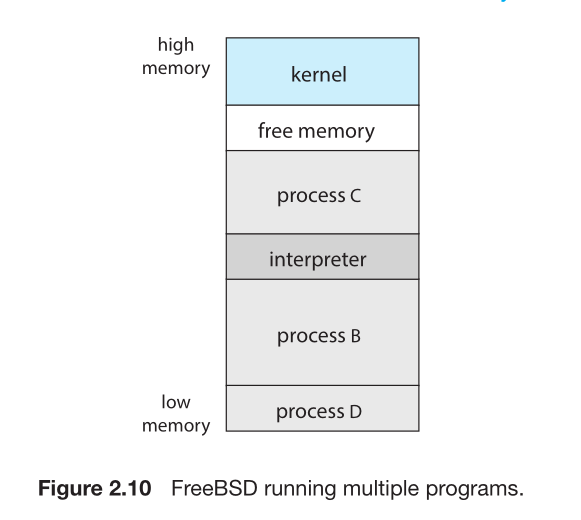 <br>

#### **Examples of Windows and UNIX System Calls**

This table from the book shows how the generic concepts map to real system calls in Windows and UNIX/Linux. Notice the different naming conventions.

| Category | Windows Example | UNIX Example |
| :--- | :--- | :--- |
| **Process Control** | `CreateProcess()`, `ExitProcess()`, `WaitForSingleObject()` | `fork()`, `exit()`, `wait()` |
| **File Management** | `CreateFile()`, `ReadFile()`, `WriteFile()`, `CloseHandle()` | `open()`, `read()`, `write()`, `close()` |
| **Device Management** | `SetConsoleMode()`, `ReadConsole()`, `WriteConsole()` | `ioctl()`, `read()`, `write()` |
| **Information Maintenance** | `GetCurrentProcessID()`, `SetTimer()`, `Sleep()` | `getpid()`, `alarm()`, `sleep()` |
| **Communications** | `CreatePipe()`, `CreateFileMapping()`, `MapViewOfFile()` | `pipe()`, `shm_open()`, `mmap()` |
| **Protection** | `SetFileSecurity()`, `InitializeSecurityDescriptor()` | `chmod()`, `umask()`, `chown()` |

---

#### **The Standard C Library: A System-Call Wrapper**

You rarely make a system call directly in a high-level language. Instead, you use functions provided by a standard library. The book uses the **Standard C Library** as a prime example.

*   **How it works:** When your C program calls `printf("Greetings")`, you are not making a system call directly.
    1.  The `printf()` function in the C library is called.
    2.  This library function contains the necessary code to make the actual `write()` system call to the operating system kernel.
    3.  The kernel performs the write operation.
    4.  The return value from the `write()` system call is passed back to the `printf()` function, which may then return it to your program.

This layer of abstraction makes programming much easier. You don't need to know the gritty details of how to talk to the kernel; you just use a well-documented, portable function like `printf()`. The library handles the system-specific work for you.

<br> 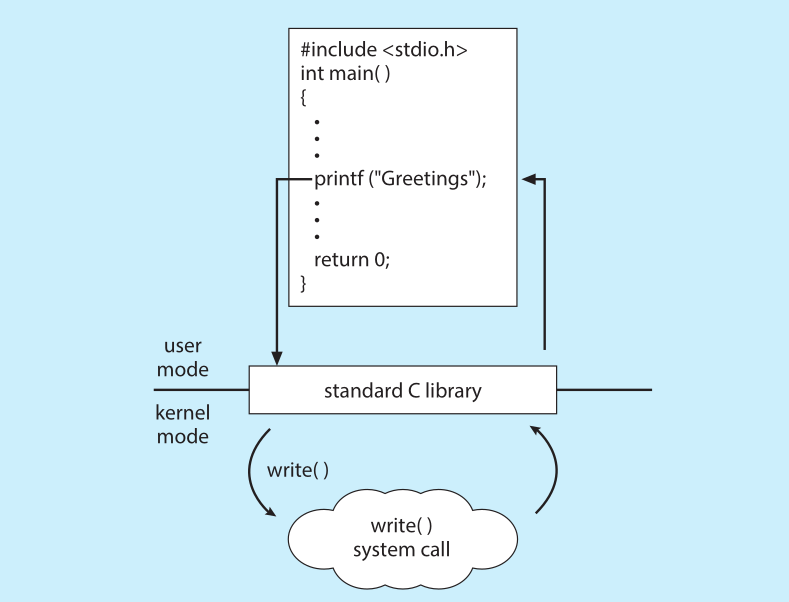 <br>




#### **2.3.3.2 File Management**

This section introduces the fundamental system calls for working with files. A more detailed discussion of file systems is covered later in the book (Chapters 13 through 15).

Think of the Operating System (OS) as a librarian and files as books. The system calls are the standardized requests you make to the librarian to manage those books.

Here are the essential system calls for file operations:

*   **`create()` and `delete()`:** These are your most basic operations.
    *   `create()`: You provide a file name (e.g., "my_essay.txt") and, optionally, some attributes (like access permissions), and the OS creates a new, empty file for you.
    *   `delete()`: You specify the name of the file, and the OS removes it from the file system, freeing up its space.

*   **`open()` and `close()`:** Before you can actually read from or write to a file, you must `open()` it. This tells the OS, "I'm about to start working with this file." The OS then does some internal preparation, like checking your permissions. When you're done, you `close()` the file. This tells the OS you're finished, allowing it to clean up and ensure all data is properly saved.

*   **`read()`, `write()`, and `reposition()`:** Once a file is open, you use these calls to interact with its content.
    *   `read()`: Retrieves data from the file.
    *   `write()`: Puts new data into the file or modifies existing data.
    *   `reposition()`: This moves the "current position" pointer within the file. For example, you can rewind to the start of the file or skip to the end. This is also often called "seeking."

**Directories:**
If files are books, directories are the shelves and sections that organize them. The same set of operations—`create`, `delete`, `open`, `close`, etc.—are typically used for directories as well.

**File Attributes (Metadata):**
Every file has associated information, known as attributes or metadata. This isn't the file's content, but information *about* the file. Examples include:
*   File Name
*   File Type (e.g., .txt, .pdf)
*   Protection Codes (who can read, write, or execute it)
*   Accounting Information (size, creation time, last modified time)

To manage this, at least two system calls are needed:
*   **`get_file_attributes()`**: To check this information.
*   **`set_file_attributes()`**: To change it (e.g., to change file permissions).

**Additional Functionality:**
Some operating systems provide direct system calls for high-level operations like `move()` and `copy()`. Others might only provide the basic building blocks (like `read` and `write`) and let you build a `copy` command using those. Finally, an OS might provide a ready-to-use program (like `cp` in Linux) that anyone can run. If this program can be called by other programs, it effectively acts as an Application Programming Interface (API).

---

#### **2.3.3.3 Device Management**

A process needs resources to run, such as CPU time, main memory, and disk drives. The OS acts as a resource manager. If a resource is free, the OS grants it to the process. If not, the process must wait.

We can think of all these resources as **devices**. Some are physical, like a printer or a disk drive. Others are abstract or virtual, like a file. Managing these devices involves specific system calls.

*   **`request()` and `release()`:** In a multi-user system, you can't have everyone printing to the same printer at the same time. To manage this, a process must first `request()` a device. If it's available, the OS grants exclusive access to that process. When the process is finished, it must `release()` the device so others can use it. This is very similar to the `open()` and `close()` system calls for files.
    *   **Important Note:** Some OSes allow unmanaged access, but this can lead to problems like **device contention** (two processes trying to use the same device simultaneously, causing chaos) and **deadlock** (a situation where two or more processes are waiting for each other to release a resource, causing everything to grind to a halt). See Chapter 8 for more on deadlock.

*   **`read()`, `write()`, and `reposition()`:** Once a device is requested and allocated, you interact with it using the same familiar calls. You can `read()` from a scanner, `write()` to a disk drive, or `reposition()` the read/write head of a hard drive.

**Unified File-Device Structure:**
The similarity between file and device operations is so strong that many operating systems, like UNIX and Linux, merge them. In this model, **everything is treated as a file**. Your keyboard, your printer, and your hard disk all appear as special files in the file system. This allows programmers to use a single, consistent set of system calls (like `read` and `write`) to communicate with many different devices. These devices might be identified by special file names (e.g., `/dev/usb`), their location in the directory tree, or specific file attributes.

**User Interface Design:**
Even if the underlying system calls for files and devices are different, the user interface (like the command line) can be designed to make them *appear* similar. This is a key design decision in OS development, aiming to create a more consistent and user-friendly experience.

#### **2.3.3.4 Information Maintenance**

This category covers system calls that are used to exchange information between a user program and the operating system itself. These calls don't primarily create files or manage devices; instead, they are used to query the state of the system, to get information about a process, or to aid in development and debugging.

**Getting System Information:**
Many system calls exist simply to provide the program with details about the OS or the computer's environment. These are like asking the OS for a status report. Common examples include:
*   **`get_time()` and `get_date()`:** Returns the current time and date from the system clock.
*   **`get_system_info()`:** Returns information like the operating system's version number, the amount of free physical memory, the amount of free disk space, or the number of currently running processes.

**Debugging and Profiling:**
A crucial set of system calls helps programmers find and fix errors in their code (debugging) and analyze its performance (profiling).

*   **`dump()`:** This system call tells the OS to take a snapshot of the program's memory (or a part of it) and write it to a file or the screen. By examining this memory dump, a programmer can see the exact state of the program at the moment it crashed or encountered an error. This is an invaluable debugging tool.

*   **Tracing System Calls:** Tools like `strace` on Linux use low-level OS facilities to intercept and log every system call a program makes. This allows you to see the exact conversation between your program and the OS, which is extremely useful for understanding complex program behavior or finding where a program is failing.

*   **Single-Step Mode (Hardware Support):** This is a feature provided by the CPU itself, which the OS and debuggers leverage. When enabled, the CPU executes one machine instruction and then generates a **trap** (a special type of interrupt). This trap is caught by a debugger program, which can then show the programmer what happened after each single instruction. This allows for very precise, instruction-by-instruction execution.

*   **Time Profiling:** This technique helps you understand where your program is spending most of its CPU time. It works by periodically sampling the value of the **program counter (PC)**.
    *   The OS sets up a timer to generate interrupts at regular, frequent intervals (e.g., every 1 millisecond).
    *   At each interrupt, the OS records the current program counter address.
    *   After the program finishes running, the OS (or a profiler tool) can analyze all the sampled addresses. If a particular function or code segment has a high number of samples, it means the program was executing there frequently, indicating a "hot spot" that might be worth optimizing for better performance.

**Process Information:**
The operating system maintains a detailed record, often called a **Process Control Block (PCB)**, for every running process. This record contains all the vital statistics about the process. System calls are used to access and modify this information.

*   **`get_process_attributes()`:** Retrieves information about a process, such as its Process ID (PID), its current state (running, waiting, etc.), its priority, what files it has open, and its CPU usage.
*   **`set_process_attributes()`:** Allows certain attributes of a process to be changed. For example, a system administrator might use this to change the priority of a process to give it more or less CPU time.

**Refer to Section 3.1.3** for a detailed list of the specific information that an operating system typically keeps about each process.

#### **2.3.3.5 Communication**

This section covers how processes talk to each other, a concept known as **Interprocess Communication (IPC)**. There are two primary models for this: Message-Passing and Shared Memory.

##### **The Message-Passing Model**

In this model, processes communicate by explicitly sending and receiving discrete packets of data, called **messages**. Think of it like sending letters or emails.

*   **Connection Setup:** Before any communication can happen, a connection must be established. This is similar to knowing someone's address before you can mail them a letter. To do this, a process needs to identify the other process it wants to talk to. This involves:
    *   **`get_hostid()`:** If the other process is on a different computer on a network, this call translates a well-known hostname (e.g., "server.com") into a network identifier like an IP address.
    *   **`get_processid()`:** This call translates a process name into a numeric Process ID (PID) that the operating system uses to uniquely identify the process.

*   **Establishing a Link:** Once the identifiers are known, a connection is opened using calls like **`open_connection()`** or by using the general file system's `open()` call on a special communication channel. The receiving process must give its permission to communicate using an **`accept_connection()`** call.

*   **Client-Server Architecture:** This is a very common pattern. A **server** (a special-purpose, always-running program called a **daemon**) executes a **`wait_for_connection()`** call, sleeping until someone wants to talk to it. A **client** process then initiates the connection. Once the connection is established, they exchange data using **`read_message()`** and **`write_message()`** system calls.

*   **Closing the Link:** Communication is terminated with a **`close_connection()`** call.

*   **Mailboxes:** Messages can also be passed indirectly through a common **mailbox** (or message queue), where processes leave and pick up messages without needing a direct, active connection at the same time.

##### **The Shared-Memory Model**

This model takes a completely different approach. Instead of sending data back and forth, processes agree to share a section of their memory. Think of this like a shared whiteboard that multiple people can read from and write to.

*   **Creation and Attachment:** Normally, the OS strictly prevents one process from accessing another's memory for safety. To bypass this, processes must explicitly create and attach to a shared memory region.
    *   **`shared_memory_create()`:** This system call creates a block of memory that can be accessed by multiple processes.
    *   **`shared_memory_attach()`:** This call grants a process access to an already created shared memory segment.

*   **Direct Access and Responsibility:** Once attached, processes can read and write data directly to this shared area simply by using pointers and memory addresses, just like accessing their own memory. This is extremely fast. However, the OS is no longer managing the data transfer. The processes themselves are entirely responsible for:
    1.  **The Format of the Data:** They must agree on what the data in the memory means.
    2.  **Synchronization:** They must ensure they are not reading and writing to the same location simultaneously, which would lead to corrupted data. (Mechanisms for this, like semaphores, are discussed in **Chapter 6**).

**Comparison of the Two Models:**

*   **Message Passing** is better for exchanging smaller amounts of data and is simpler because the OS handles the synchronization. It is also the only practical choice for communication between computers over a network.
*   **Shared Memory** is the fastest form of IPC because it works at memory speed. It is ideal for high-performance computing on a single machine where large amounts of data need to be exchanged. The main disadvantages are the complexity of managing synchronization and the potential for errors if not done correctly.

**(Refer to Chapter 4** for a discussion on threads, which are a variation of processes that share memory by default.)

---

#### **2.3.3.6 Protection**

Protection is the mechanism that controls what resources a user or a process is allowed to access. Historically, this was only a major concern for large, multi-user systems. Today, with networking so pervasive, *every* computer—from servers to your smartphone—must have robust protection.

Protection is about enforcing the rules that define who can do what.

**Key System Calls for Protection:**

*   **`set_permission()` and `get_permission()`:** These calls are used to manipulate the access rights (e.g., read, write, execute) for resources like files and disks.
*   **`allow_user()` and `deny_user()`:** These calls are used to explicitly grant or revoke a specific user's access to a particular resource.

**Protection vs. Security:**
It is important to distinguish between these two related concepts:
*   **Protection:** The *internal* mechanism (the rules and the enforcement) that controls how programs and users access system resources. (Covered in **Chapter 17**).
*   **Security:** The larger, external defense of a system against *external threats* (like hackers and malware). Security uses protection mechanisms as one of its primary tools. (Covered in **Chapter 16**).

## **2.4 System Services (System Utilities)**

#### **Introduction: The Ecosystem on Top of the OS**

Recall the logical computer hierarchy from **Figure 1.1**: Hardware -> Operating System -> **System Services** -> Application Programs. System services, also known as **system utilities**, are programs that provide a convenient environment for developing and running other programs. They are not part of the operating system kernel but are bundled with it. Some are simple wrappers around system calls, while others are very complex.

These services can be categorized as follows:

#### **Categories of System Services**

**1. File Management**
These utilities help users and programs manipulate files and directories. Common operations include:
*   Creating, deleting, copying, and renaming files and directories.
*   Printing, listing, and displaying file contents.
*   Managing file permissions and attributes.

**2. Status Information**
These programs query the system for information. They range from simple to complex:
*   **Simple:** Getting the date, time, available memory, disk space, or number of users.
*   **Complex:** Providing detailed performance data, system logs, and debugging information.
The output can be sent to a terminal, a file, or a GUI window. Some systems, like Windows, use a **registry**—a central database for storing and retrieving system and application configuration information.

**3. File Modification**
These are utilities for creating and editing the content of text files.
*   **Text Editors:** Programs like `vim`, `nano`, or GUI editors allow users to create and modify files.
*   **Text Processing Commands:** Special utilities to search file contents (e.g., `grep`) or transform text (e.g., `sed`, `awk`).

**4. Programming-Language Support**
To support software development, operating systems often come with or provide easy access to:
*   **Compilers** (e.g., for C, C++), **assemblers**, **debuggers**, and **interpreters** (e.g., for Python, Java).
These may be included or available as a separate download.

**5. Program Loading and Execution**
Once a program is compiled, it must be loaded into memory. The system provides tools for this:
*   **Loaders:** Programs like **absolute loaders**, **relocatable loaders**, and **linkage editors** handle the complex process of preparing an executable file and loading it into memory for execution.
*   **Debuggers:** Systems for debugging programs, both at the high-level language and machine code levels.

**6. Communications**
These programs establish connections between processes, users, and different computer systems. They enable:
*   Sending instant messages between users.
*   Browsing web pages.
*   Sending and receiving email.
*   Remote login (e.g., using `ssh`).
*   Transferring files between machines (e.g., using `ftp` or `scp`).

**7. Background Services (Daemons)**
General-purpose systems launch many system processes automatically at boot time. Constantly running system processes are known as **services**, **subsystems**, or **daemons**.
*   **Examples:**
    *   The **network daemon** that listens for incoming connections.
    *   **Process schedulers** that start jobs at specific times.
    *   **System error monitoring** services.
    *   **Print servers** that manage print jobs.
A typical system has dozens of such daemons running in the background. They are essential for performing system-level tasks outside the kernel.

#### **Application Programs and the User's View**

Along with system programs, operating systems are typically distributed with useful **application programs** for common tasks, such as:
*   Web browsers, word processors, spreadsheets.
*   Database systems, compilers, games.
*   Plotting and statistical-analysis packages.

**The Crucial Point:** For most users, the "operating system" is defined by these **application and system programs**, not by the underlying system calls. The user interface shapes the entire experience.

*   **Example 1:** A user on a Mac sees the **Aqua GUI** and the **UNIX shell** in a terminal window. Both interfaces use the same set of macOS system calls, but they present them in completely different ways.
*   **Example 2:** A user can **dual-boot** the same PC into either **macOS** or **Windows**. This means the same user, on the same hardware, interacts with two entirely different sets of applications and interfaces, all built upon different implementations of system services and system calls that manage the same physical resources.

## **2.5 Linkers and Loaders**

This section explains the journey a program takes from being source code on a disk to a running process in memory. The steps involved are compiling, linking, and loading, which are visually summarized in **Figure 2.11**.
<br> 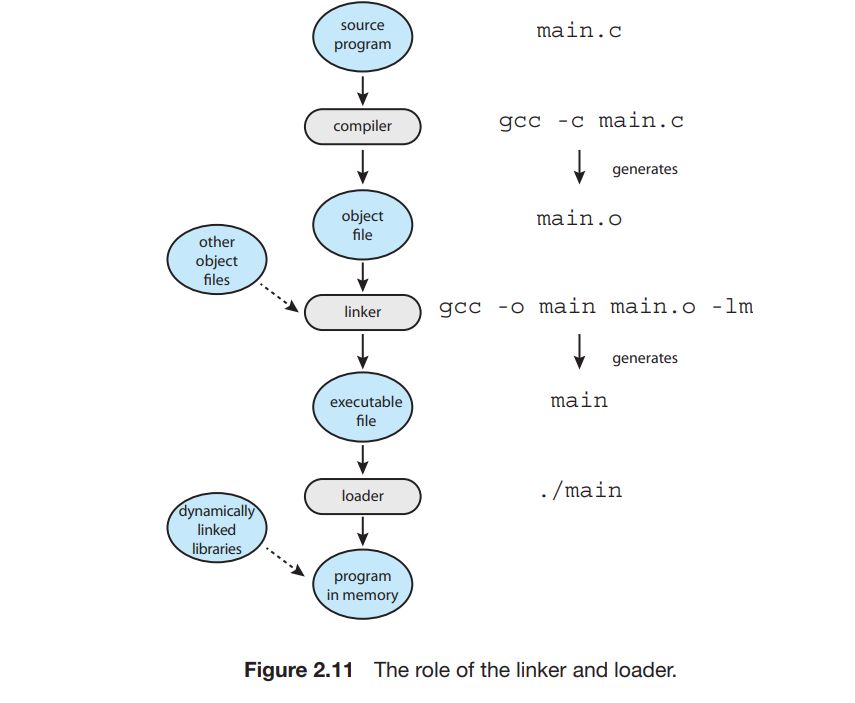 <br>
#### **The Steps from Source Code to Execution**

1.  **Compilation (`gcc -c main.c`):**
    *   Your source code (e.g., `main.c`) is processed by a **compiler**.
    *   The output is an **object file** (e.g., `main.o`).
    *   This object file is in a **relocatable object file** format. This means the machine code inside is not yet tied to a specific memory address; it's designed to be loaded into *any* available location in physical memory.

2.  **Linking (`gcc -o main main.o -lm`):**
    *   The **linker** takes one or more relocatable object files (like `main.o`) and combines them into a single **binary executable file** (e.g., `main`).
    *   The linker also incorporates code from libraries (like the math library, specified by `-lm`). These libraries are collections of pre-compiled object files for common tasks.
    *   A key job of the linker is **relocation**. It assigns final memory addresses to the various parts of the program (code, data) and then adjusts all the references within the code to match these final addresses. For example, it ensures a call to `printf()` actually goes to the correct location of the `printf` function in the standard library.

3.  **Loading (`./main`):**
    *   The **loader** is the part of the operating system that places the executable file into memory so it can run.
    *   When you type a command like `./main` in a shell, the shell first uses the `fork()` system call to create a new process. It then uses the `exec()` system call to invoke the loader.
    *   The loader loads the program's code and data into the memory of the newly created process. Once loaded, the program is eligible to be scheduled to run on a CPU core.

#### **Static vs. Dynamic Linking**

The process described above implies that all libraries are fully copied ("statically linked") into the executable file. However, most systems use a more efficient method called **dynamic linking**.

*   **Statically Linked Libraries:** The library code is physically copied into the executable file at link time. This creates a large, self-contained executable that doesn't depend on external files, but it wastes disk and memory space if multiple programs use the same library.

*   **Dynamically Linked Libraries (DLLs in Windows, Shared Objects in Linux):** The library code is *not* copied into the executable. Instead, the linker only inserts some **relocation information** (a "stub") that tells the loader, "This program needs this library."
    *   When the program is loaded, the loader sees this information and dynamically links the required library, loading it into memory.
    *   **Major Benefit:** Multiple running processes can all share a single copy of a dynamically linked library in memory, leading to significant memory savings. (This is covered in more detail in **Chapter 9**).

#### **Executable File Formats**

Object and executable files are not just raw machine code; they have a standard structure that includes the code itself and a **symbol table** (metadata about functions and variable names used in the program).

*   **ELF (Executable and Linkable Format):** This is the standard format used by UNIX, Linux, and many other systems. There are different ELF formats for relocatable object files (`*.o`) and final executable files.
    *   The `file` command can be used to identify a file's type (e.g., `file main.o` reports it as an ELF relocatable file).
    *   The `readelf` command can inspect the detailed sections of an ELF file.
    *   A crucial piece of information in an executable ELF file is the **program entry point**—the memory address of the very first instruction to be executed when the program starts.

*   **Other Formats:** Windows uses the **PE (Portable Executable)** format, and macOS uses the **Mach-O** format. They serve the same fundamental purpose as ELF.

## **2.6 Why Applications Are Operating-System Specific**

This section explains a fundamental reality of computing: a program compiled for Windows won't run on macOS, and an Android app won't run on an iPhone. While it would be ideal if all programs were universally compatible, several technical barriers prevent this.

#### **The Core Problem: A House Divided**

An application and an operating system are built to work together like a custom key and a specific lock. The main reasons for this incompatibility are:

1.  **Different System Calls:** As discussed earlier, each OS provides a unique set of system calls. An application written for one OS is full of requests for that OS's specific "services." Another OS simply won't understand these requests.
2.  **Different Executable File Formats:** Each OS has a specific binary format for executable files (like ELF for Linux, PE for Windows, Mach-O for macOS). The OS's loader expects the file to be structured in a precise way with a specific header and layout. A format it doesn't recognize cannot be loaded. **Go to Figure 2.11** to see the loader's role in this process.
3.  **Different CPU Instruction Sets:** Even on the same physical hardware, different operating systems might manage the CPU differently. More fundamentally, applications are compiled into machine code for a specific CPU architecture (like Intel x86 or ARM). An ARM CPU cannot execute instructions meant for an x86 CPU, and vice-versa.

#### **How Cross-Platform Applications Are Made Possible**

Despite these barriers, you do see applications like Firefox or Python scripts running on multiple systems. This is achieved through one of three primary methods:

1.  **Interpreted Languages (e.g., Python, Ruby):**
    *   The application is distributed as human-readable source code.
    *   An **interpreter**, which is a native program written for each specific OS, reads the source code line-by-line and executes the equivalent native OS instructions on the fly.
    *   **Drawbacks:** Performance is slower than native code because of the real-time translation. The application is also limited to the features provided by the interpreter, which may not expose all the advanced features of the underlying OS.

2.  **Virtual Machines and Runtime Environments (e.g., Java):**
    *   The application is compiled into an intermediate, platform-neutral code called **bytecode** (e.g., Java `.class` files).
    *   A **Runtime Environment (RTE)**, like the Java Virtual Machine (JVM), is a native program that is ported to many different operating systems. This RTE loads the bytecode and translates it into native machine instructions for the host OS and CPU as the program runs.
    *   **Drawbacks:** Similar to interpreters, this "just-in-time" compilation can impact performance, and the application is confined to the "sandbox" of the virtual machine.

3.  **Porting the Application (e.g., using POSIX API):**
    *   The developer writes the application in a standard language (like C) and uses a standardized API (like **POSIX** for UNIX-like systems).
    *   To run on a different OS, the application's source code must be **ported**. This means it is recompiled from source using a compiler and libraries specifically for that target operating system.
    *   **Drawback:** This is time-consuming and expensive, as it requires a separate build, testing, and debugging cycle for *each* operating system version.

#### **The Deeper Challenges: APIs and ABIs**

Even with the methods above, creating a true "write once, run anywhere" application is very difficult due to deeper system-level differences.

*   **Application Programming Interface (API):** This is a high-level set of functions for building software. An application designed to use the iOS API for its user interface will not work on Android, which provides a completely different set of GUI APIs.

*   **Application Binary Interface (ABI):** This is the *low-level* equivalent of an API. An ABI is a strict contract that defines exactly how binary code should interact with a specific operating system on a specific CPU architecture. It dictates:
    *   How parameters are passed to system calls.
    *   The organization of the program's stack in memory.
    *   The binary format of system libraries.
    *   The sizes of fundamental data types (e.g., `int`, `long`).
    An ABI is defined for a specific combination, like "Linux on ARMv8." A binary compiled for one ABI will not work on a system with a different ABI.

**In summary,** the combination of unique system calls, different executable file formats, varying CPU architectures, and the strict requirements of APIs and ABIs means that an application is inherently tied to its target platform. The cross-platform applications we use represent a massive engineering effort to port, interpret, or virtualize the code for each specific operating system and hardware combination.

## **2.7 Operating-System Design and Implementation**

Designing and building an operating system (OS) is a complex challenge with no single "correct" answer. However, there are successful strategies and principles that guide developers. This section covers the initial design goals and a fundamental principle for creating flexible systems.

---

### **2.7.1 Design Goals**

The very first step in creating an OS is to define what it should do. The high-level goals are shaped by two main factors:
1.  **The Hardware:** What type of computer will it run on?
2.  **The System Type:** Is it for a traditional desktop/laptop, a mobile device, a distributed network, or a real-time control system?

Once these are known, requirements can be split into two groups: what users want and what system developers need.

#### **User Goals**
These are the qualities an end-user (like you) cares about. A system should be:
*   **Convenient, Easy to Learn, and Easy to Use**
*   **Reliable** (it doesn't crash)
*   **Safe** (secure from threats)
*   **Fast**

While these goals are obvious to the user, they are too vague for a developer. There's no universal agreement on how to specifically achieve "easy to use" or "fast" in code.

#### **System Goals**
These are the qualities important for the people who design, build, and maintain the OS. The system should be:
*   **Easy to Design, Implement, and Maintain**
*   **Flexible** (able to adapt to new requirements)
*   **Reliable and Error-Free**
*   **Efficient** (in its use of hardware resources)

Like user goals, these are also somewhat vague and open to interpretation.

**The Key Takeaway:** There is no single set of requirements for all operating systems. The "right" design depends entirely on the environment. For example:
*   **VxWorks** (a real-time OS for embedded systems like Mars rovers) has vastly different requirements than **Windows Server** (an OS for managing large enterprise networks).

Designing an OS is a creative task. While there's no recipe, software engineering provides useful principles to guide the process.

---

### **2.7.2 Mechanisms and Policies**

A crucial principle for building a flexible and maintainable OS is the **separation of policy from mechanism**.

*   **Mechanism:** This refers to *how* something is done. It's the underlying algorithm or code that provides a capability.
*   **Policy:** This refers to *what* will be done. It's the decision-making rule that uses the mechanism.

**A Simple Analogy:** Think of a traffic light.
*   The **mechanism** is the light itself—its wiring, timers, and bulbs that make it change colors.
*   The **policy** is the decision of how long the light stays green for the main road versus the side road.

#### **Why is this Separation Important?**
The main benefit is **flexibility**. Policies change often, but mechanisms do not. If they are tightly bound together, every time you want to change a policy, you have to rewrite the mechanism.

By keeping them separate, you can support different policies by simply changing a parameter for the general mechanism.

**OS Example 1: CPU Protection**
*   The **mechanism** is the **timer** (as discussed in Section 1.4.3), which is a piece of hardware that interrupts the CPU after a set time.
*   The **policy** is deciding *how long* that timer is set for each user. Should each user get 100 milliseconds or 200 milliseconds? This is a policy decision that can be changed without altering the timer mechanism itself.

**OS Example 2: Process Priority**
*   The **mechanism** is a system that can assign and enforce different priority levels for programs.
*   The **policy** is the rule for assigning those priorities. Should I/O-intensive programs (like a video player) have higher priority than CPU-intensive programs (like a scientific calculation)? The same mechanism can be used to enforce either policy just by changing the rule.

#### **This Principle in Practice**

*   **Microkernel OS (like Mach):** Take this idea to the extreme. They provide only the most basic, policy-free mechanisms (the bare-minimum building blocks). All higher-level policies (like how to schedule the CPU) are built on top of this, often by user-level programs(user made kernel), making the system very flexible.

*   **Windows and macOS:** Use a different approach. They build both the mechanism *and* policy directly into the kernel. This enforces a consistent "look and feel" and behavior across all devices running that OS. The trade-off is less flexibility for the sake of a uniform user experience.

*   **Open Source vs. Commercial (Linux vs. Windows):**
    *   The standard **Linux** kernel comes with a specific CPU scheduler (a mechanism with a default policy). However, because the code is open, anyone can modify or replace this scheduler to implement a *different policy*.
    *   In contrast, with **Windows**, the scheduling mechanism and policy are fixed within the kernel and cannot be easily changed by the user.

**Final Note:** Policy decisions are needed whenever a resource (CPU time, memory, etc.) must be allocated. The question "**What** should be done?" is a policy question. The question "**How** do we do it?" is a mechanism question. Keeping them separate is a hallmark of good OS design.

### **2.7.3 Implementation**

After the design of an operating system is planned, the next step is to actually build it—this is the implementation phase. Operating systems are massive collections of programs, often developed by hundreds of people over many years, so it's hard to generalize about how they are built. However, we can look at the common tools and languages used.

#### **The Shift from Assembly to High-Level Languages**

*   **Early Days:** The first operating systems were written entirely in **assembly language**. This is a very low-level programming language that has a direct, one-to-one relationship with the machine's hardware instructions.
*   **Modern Practice:** Today, almost all operating systems are written primarily in **high-level languages** like **C** or **C++**. Only a very small, critical parts of the system are still written in assembly language.

Modern OSs often use a mix of languages for different layers:
*   **Lowest Level (The Kernel Core):** Written in **C** and a little bit of **Assembly**.
*   **Higher-Level Routines:** Written in **C** and **C++**.
*   **System Libraries & Frameworks:** Can be written in **C++** or even higher-level languages like **Java**.

**A Concrete Example: Android**
The book uses Android as a great real-world example of this layered language approach (we'll cover its full architecture in more detail in Section 2.8.5.2). Its components are built with different languages:
*   **Kernel:** Mostly **C** with some **Assembly**.
*   **System Libraries:** **C** or **C++**.
*   **Application Frameworks** (the interface for app developers): Mostly **Java**.

#### **Advantages of Using High-Level Languages**

Using languages like C/C++ instead of assembly offers the same benefits for OS development as it does for regular application programming:

1.  **Faster Development:** Code is written more quickly.
2.  **Compactness:** The source code is more concise and smaller.
3.  **Understandability and Debugging:** The code is easier for humans to read, understand, and fix.
4.  **Compiler Benefits:** When compiler technology improves, you can simply **recompile** the entire OS to get better, more optimized machine code without changing a single line of your original source code.
5.  **Portability:** This is a huge advantage. An OS written in a high-level language is **much easier to adapt ("port") to run on different hardware** (like moving from Intel x86 chips to ARM chips in phones and tablets). The alternative—rewriting the entire OS in a new assembly language for each hardware platform—would be a monumental task.

#### **Addressing the Potential Disadvantages**

You might wonder, "But isn't assembly language faster?" The potential downsides of using a high-level language are:
*   Reduced speed of the final program.
*   Increased memory/storage requirements.

However, the book explains that **these are not major issues for modern systems.** Here’s why:

*   **Modern Compilers are Brilliant:** While an expert human can write super-efficient *small* routines in assembly, a modern compiler can analyze *entire large programs* and apply complex optimizations that are beyond human capability. It can perfectly handle the intricate details of modern processors with features like deep pipelining and multiple execution units.

*   **Algorithm over Code:** The biggest performance gains in an OS come from using better **data structures and algorithms**, not from hand-optimizing every line in assembly. A smart algorithm in C will almost always beat a mediocre one written in perfect assembly.

*   **Only a Small Part is Critical:** Although operating systems are large, only a tiny fraction of the code is "performance-critical." The key routines where speed is absolutely essential are:
    *   **Interrupt handlers**
    *   **I/O Manager**
    *   **Memory Manager**
    *   **CPU Scheduler**

The standard practice is to first get the entire system working correctly using high-level languages. Once it's working, developers can use profiling tools to **identify performance bottlenecks**. Only these specific, critical sections are then optimized or carefully rewritten for maximum efficiency.

## **2.8 Operating-System Structure**

A modern operating system is incredibly large and complex. To manage this complexity and make the system easier to build, maintain, and modify, it must be carefully organized. A standard engineering approach is to break the huge task down into smaller, manageable pieces called **modules**.

Each module should be a well-defined part of the system with clear responsibilities and cleanly specified interfaces for interacting with other modules.

**A Programming Analogy:** Think about how you structure a large program. You don't put all your code inside the `main()` function. Instead, you separate logic into multiple functions, each with a clear purpose, defined parameters, and return values. You then call these functions from `main()`. Structuring an OS uses the same fundamental principle but on a much larger scale.

We learned about the common components of an OS (like the process scheduler, memory manager, etc.) in Chapter 1. Now, we will look at how these components are connected and fused together to form the **kernel**.

---

### **2.8.1 Monolithic Structure**

The simplest way to structure an operating system kernel is to use no formal structure at all. This approach is called the **Monolithic Structure**.

In a monolithic kernel, all the functionality of the kernel—the file system, CPU scheduler, memory manager, device drivers, etc.—is packed into a single, large, static binary file. This entire kernel runs in a single, powerful memory area known as **kernel space** (a single address space).

#### **The UNIX Example**

The original UNIX operating system is a classic example of this approach, though with some minor structuring. It was divided into two main parts:
1.  The **kernel**
2.  The **system programs** (everything outside the kernel)

The kernel itself was a monolithic entity, but as it evolved, it was separated into various interfaces and device drivers.

**Go to Figure 2.12: Traditional UNIX system structure.**
<br> 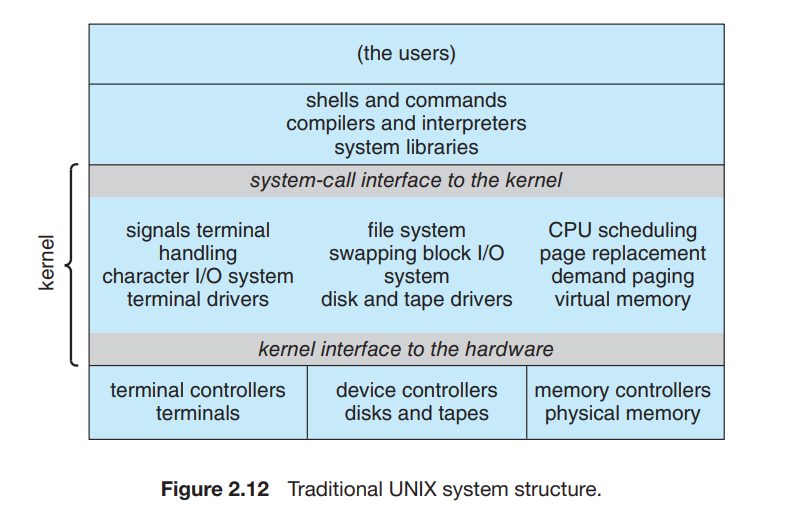 <br>
This figure shows a simplified, layered view of traditional UNIX. Notice that **everything below the system-call interface and above the physical hardware is the kernel**. It's a single block that contains a huge amount of functionality, from the file system and CPU scheduling down to the drivers that talk directly to the disks and memory.

#### **The Linux Example**

Linux, which is based on UNIX, also uses a monolithic kernel. **Go to Figure 2.13: Linux system structure.**


<br> 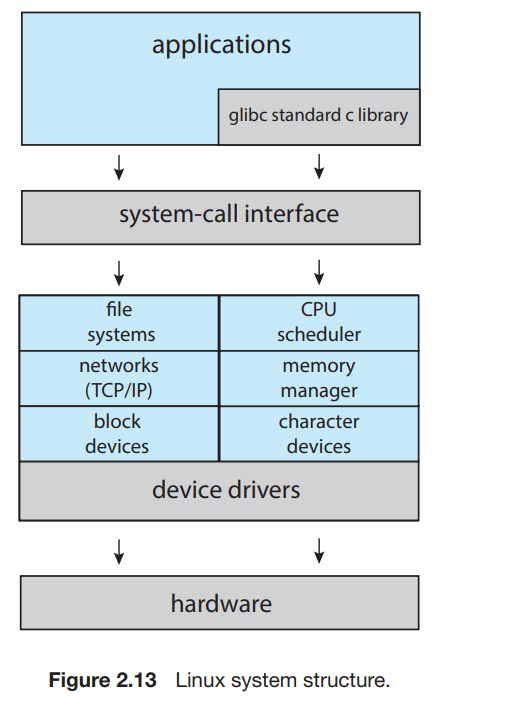 <br>



This figure shows how applications use the `glibc` (GNU C Library) to make system calls into the kernel. The Linux kernel itself runs entirely in kernel mode in a single address space, making it monolithic.

However, an important modern feature is that Linux has a **modular design**. This means you can add and remove kernel functionality (like device drivers) while the system is running, which we will discuss in Section 2.8.4. This modularity helps manage the complexity of a monolithic kernel.

#### **Advantages and Disadvantages of a Monolithic Kernel**

*   **Disadvantage: Complexity and Inflexibility**
    *   They are difficult to implement correctly and can be hard to extend or modify because all the parts are intertwined. A bug in one driver can crash the entire kernel.

*   **Advantage: Performance**
    *   This is the main reason monolithic kernels are still widely used. Because everything is in one address space:
        *   **System calls** are fast (there's very little overhead when switching into the kernel to perform a task).
        *   **Communication within the kernel** is extremely fast (functions can just call each other, as there are no barriers between components).

**Conclusion:** Despite the drawbacks in complexity, the raw **speed and efficiency** of monolithic kernels are so significant that they are the foundation of major operating systems like UNIX, Linux, and Windows.


### **2.8.2 Layered Approach**

The monolithic kernel we just discussed is often called a **tightly coupled system** because all its parts are interconnected; a change in one part can have unexpected and wide-ranging effects on other parts.

To address this, we can design a **loosely coupled system**. In this design, the kernel is divided into separate, smaller components where each has a specific and limited job. The big advantage of this **modular approach** is that a change in one component only affects that component, giving developers much more freedom to modify and improve parts of the system in isolation.

There are several ways to build a modular system. One classic method is the **Layered Approach**.


<br> 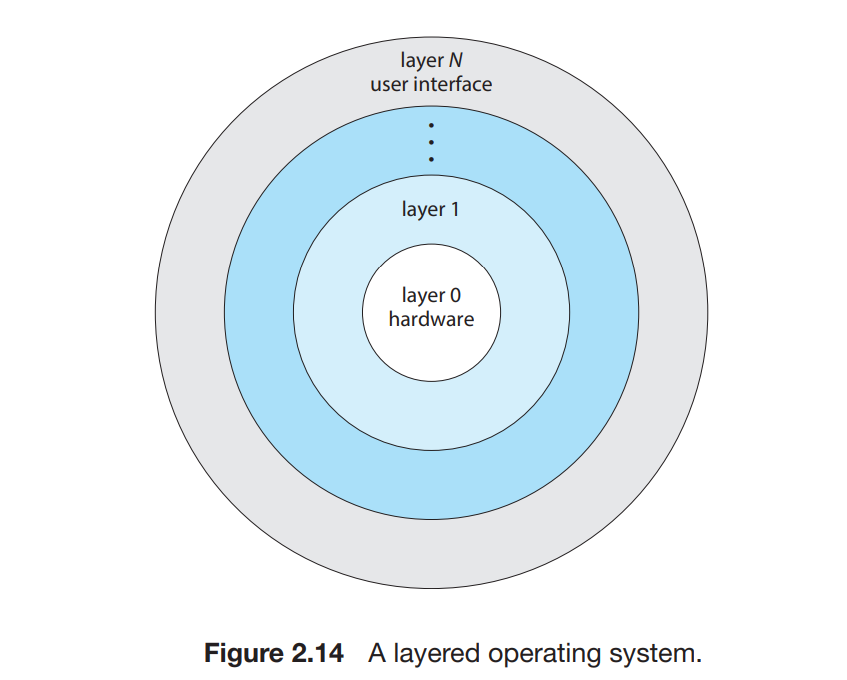 <br>



#### **What is the Layered Approach?**

In this model, the operating system is broken down into a series of hierarchical **layers** (or levels). **Go to Figure 2.14: A layered operating system.**

*   The lowest layer, **Layer 0**, is the hardware itself.
*   The highest layer, **Layer N**, is the user interface.
*   Every layer in between is a step in the hierarchy, building upon the one below it.

#### **How a Layer Works**

An operating-system layer is essentially an **abstract object**. This means it is made up of:
1.  **Data**: The information it manages.
2.  **Operations**: The set of functions that can manipulate that data.

Here's how the layers interact:
*   A typical layer, let's call it **Layer M**, can be invoked by the higher-level layer above it, **Layer M+1**.
*   In order to do its job, **Layer M** can, in turn, invoke operations on the lower-level layer beneath it, **Layer M-1**.

#### **Advantages of the Layered Approach**

The primary advantage is **simplicity in construction and debugging**. The system is built like a stack of building blocks, from the bottom up.

1.  **Easier Debugging:** You debug the system one layer at a time, starting from the bottom.
    *   You debug **Layer 0** (which interacts directly with the hardware) without worrying about any other layers because it relies on nothing else (assuming the hardware works).
    *   Once Layer 0 is confirmed correct, you debug **Layer 1**. Any error you find *must* be in Layer 1, because you've already proven Layer 0 is correct.
    *   This process continues upward. This makes finding the source of a bug much more straightforward.

2.  **Information Hiding (Abstraction):** Each layer only needs to know *what* the layer below it does, not *how* it does it. Layer M uses the services of Layer M-1 as a "black box." This hides the complex details of data structures, operations, and hardware from the higher-level layers, simplifying the design of each layer.

#### **Disadvantages and Why It's Rarely Used Pure**

While this approach is very clean, relatively few modern operating systems use a *pure* layered approach. Two major reasons are:

1.  **Difficulty in Layer Definition:** It is very challenging to define the functionality of each layer perfectly. For example, should the virtual memory manager (which needs to swap pages to disk) be above or below the disk driver layer? The virtual memory layer needs the disk driver, but putting it above would violate the rule that a layer can only use the layer immediately below it.

2.  **Performance Overhead:** This is a critical flaw. In a strictly layered system, a simple user request (like writing to a file) might have to pass down through many layers (e.g., user program -> file system layer -> memory management layer -> disk scheduler layer -> disk driver layer), with each step adding a small amount of overhead. This can make the overall system slower compared to a monolithic kernel where components can communicate directly.

**Conclusion:** You will see successful layered designs in other areas, like the **TCP/IP network protocol stack**. In modern OS design, the pure layered approach is not common. However, the general idea of **modularity** is essential. Most contemporary systems use a hybrid approach with **fewer, more powerful layers**, gaining the benefits of modular, maintainable code while avoiding the strict performance and definition problems of a pure layered model.

### **2.8.3 Microkernels**

As we learned, the original UNIX kernel was monolithic and became large and difficult to manage as it grew. To solve this problem, researchers developed a different structural approach called the **Microkernel**.

This method aims to simplify the kernel by removing all non-essential components from it. These removed components (like file systems, device drivers, etc.) are then implemented as standard **user-level programs** that run in their own separate address spaces. The result is a much smaller, minimal kernel—the "micro" kernel.

There's no absolute rule on what is "essential," but typically, a microkernel provides only the most fundamental services:
*   Minimal Process Management (e.g., creating threads/tasks)
*   Minimal Memory Management (e.g., basic address space management)
*   **Interprocess Communication (IPC)** - This is the most critical service.

**Go to Figure 2.15: Architecture of a typical microkernel.**

<br> 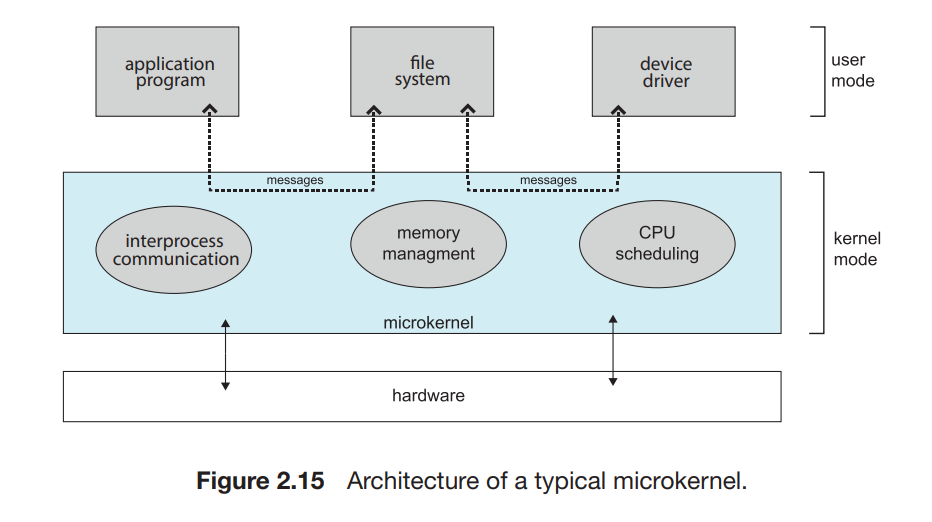 <br>


This figure shows how the system is structured. The microkernel itself is small and sits at the core. Other services, like the file system and device drivers, are now separate "servers" or "programs" running in user space. The application program interacts with these services through the microkernel.

#### **How it Works: Message Passing**

The main job of the microkernel is to act as a secure messenger, providing **communication** between client programs (like your application) and the various services (like the file server) using a technique called **message passing** (which we discussed in Section 2.3.3.5).

**Example:** When your application wants to read a file, here is the process:
1.  Your application (the client) cannot talk directly to the file server.
2.  Instead, it sends a message to the microkernel saying, "I want to read from this file."
3.  The microkernel safely passes this message to the file server, which is running as a user process.
4.  The file server does the work, gets the data, and sends a reply message back to the microkernel.
5.  The microkernel then passes this reply message back to your application.

The client and service never interact directly; all communication is brokered by the microkernel.

#### **Advantages of the Microkernel Approach**

1.  **Easier Extension:** Adding a new service (e.g., a new file system) does not require modifying the kernel. You simply add a new user-level program. This makes the system more modular and flexible.
2.  **Portability:** Because the kernel is so small, it's easier to adapt the entire operating system to new hardware platforms.
3.  **Security and Reliability:** This is a major benefit. Since most services run as user processes, they are isolated from the kernel and from each other. If a file server crashes, it can be restarted without bringing down the entire machine. A bug in a device driver won't crash the kernel.

**Real-World Examples:**
*   **Darwin:** This is the kernel at the heart of **macOS and iOS**. Darwin actually contains the **Mach microkernel** as one of its core components. We will explore this more in Section 2.8.5.1.
*   **QNX:** A very reliable real-time OS used in embedded systems (like cars and medical devices). Its Neutrino microkernel is tiny and only handles core tasks; everything else is a user process.

#### **The Major Disadvantage: Performance**

The biggest problem with microkernels is **performance overhead**.

*   **Message Copying:** When two services need to communicate, messages must be copied between their separate address spaces. This is slower than the simple function calls used in a monolithic kernel.
*   **Context Switching:** The OS must constantly switch between processes—from the application, to the kernel, to the server, and back. Each of these "context switches" takes a significant amount of time.

This performance hit has been the main reason microkernels are not more widespread.

**A Case Study: Windows NT**
*   The first version of Windows NT was designed with a microkernel structure.
*   Its performance was poor compared to the monolithic Windows 95.
*   To fix this, Microsoft in Windows NT 4.0 **moved key services back from user space into kernel space**, making the architecture more monolithic to gain speed.
*   This trend continued, and modern Windows versions are now more monolithic than microkernel.

We will see in Section 2.8.5.1 how macOS uses clever techniques to mitigate the performance penalties of its Mach microkernel.

### **2.8.4 Modules**

The most prevalent design methodology in modern operating systems is the use of **Loadable Kernel Modules (LKMs)**. This approach tries to get the best of all worlds: the performance of a monolithic kernel and the flexibility of a microkernel.

In this design, the kernel is structured as a set of **core components** and can dynamically link in additional services via **modules**. These modules can be loaded when the system boots or, crucially, **while the system is running**.

The main idea is to keep the fundamental services in the core kernel, while implementing other, more specific services as dynamically loadable pieces. This is far superior to the old method of building every feature directly into the kernel, which would require a lengthy kernel recompilation for every new device or file system you wanted to support.

**Example:** The kernel might have its core CPU scheduler and memory manager built-in. Support for a specific file system (like NTFS) or a new device (like a unique graphics card) would then be added as a loadable module.

#### **Relationship to Other Structures**

The modular approach is a hybrid that borrows ideas from earlier models:

*   **Compared to Layered Systems:** It is similar because each module has well-defined and protected interfaces. However, it is **more flexible** because a module is not restricted to only calling the module below it; any module can call any other module.
*   **Compared to Microkernels:** It is similar because the kernel keeps its core small and loads other services. However, it is **much more efficient** because modules are loaded *directly into kernel space*. They can communicate with each other using fast function calls, avoiding the slow **message passing** and **context switching** between user-space processes that plagues pure microkernels.

#### **The Linux Example**

Linux uses loadable kernel modules extensively, especially for:
*   **Device Drivers**
*   **File System Support**

This is why, when you plug a new USB device into a running Linux machine, the system can automatically find and load the necessary driver module without needing to reboot. Similarly, modules can be unloaded from the kernel when they are no longer needed.

**The Result for Linux:** LKMs give Linux the **dynamic and modular** qualities that make it easy to extend, while preserving the raw **performance benefits** of a monolithic kernel where everything runs in the same address space.

---

### **2.8.5 Hybrid Systems**

In the real world, almost no operating system uses a single, pure structural model. Instead, they combine the best ideas from different models to create **Hybrid Systems** that balance performance, security, and usability.

Let's look at how major OSs are hybrids:

*   **Linux:** Is fundamentally **monolithic** (for performance) but uses **loadable kernel modules** (for flexibility).
*   **Windows:** Is also largely **monolithic** (for performance), but it incorporates microkernel ideas. For example, it runs some subsystems (called "personalities") as separate user-mode processes for isolation, and it also supports **dynamically loadable kernel modules**.

We will now explore the architectures of three specific hybrid systems: macOS, iOS, and Android.

#### **2.8.5.1 macOS and iOS**

This section details the architecture of Apple's operating systems: **macOS** for desktops/laptops and **iOS** for mobile devices (iPhone/iPad). While designed for different hardware, they share a significant amount of underlying architecture. The general structure is layered, as shown in the diagram.

**Go to Figure 2.16: Architecture of Apple’s macOS and iOS operating systems.**


<br> 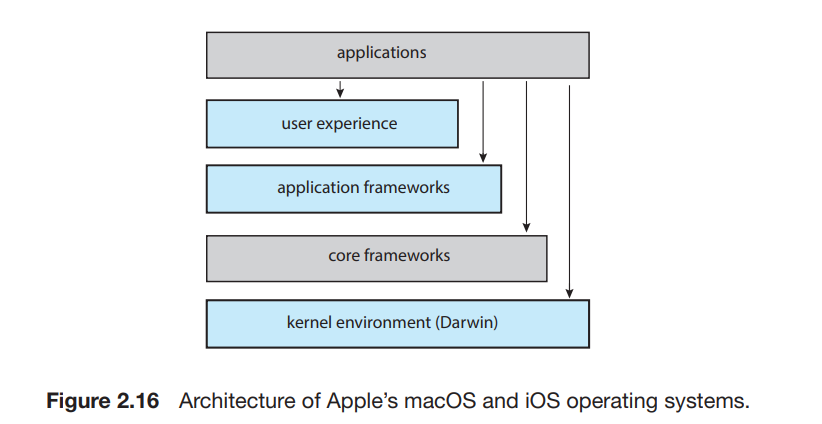 <br>



The architecture consists of the following layers, from top to bottom:

##### **Layered Architecture Overview**

1.  **User Experience Layer:**
    *   This is the software interface that users directly see and interact with.
    *   **macOS** uses the **Aqua** interface, designed for use with a mouse or trackpad.
    *   **iOS** uses the **Springboard** interface, designed for touch screens.

2.  **Application Frameworks Layer:**
    *   This layer provides the key Application Programming Interfaces (APIs) for developers.
    *   It includes the **Cocoa** framework (for macOS) and **Cocoa Touch** framework (for iOS).
    *   These frameworks are used with Objective-C and Swift programming languages.
    *   The main difference is that Cocoa Touch provides support for mobile-specific hardware features like touch screens.

3.  **Core Frameworks Layer:**
    *   This layer contains frameworks that handle graphics and media.
    *   Examples include **QuickTime** and **OpenGL**.

4.  **Kernel Environment:**
    *   This is the foundation of the entire operating system, known as **Darwin**.
    *   Darwin is a hybrid kernel that includes the **Mach microkernel** and parts of the **BSD UNIX** kernel. We will explore Darwin in more detail shortly.

The diagram also shows that applications have flexibility. They can:
*   Use the high-level user experience features.
*   Bypass the UI and interact directly with the Application or Core Frameworks.
*   Bypass all frameworks entirely and communicate **directly with the Darwin kernel environment**. An example is a simple C program that makes standard POSIX system calls.

##### **Key Differences Between macOS and iOS**

Despite their shared architecture, there are important distinctions:

*   **Hardware and Architecture:**
    *   **macOS** is compiled to run on **Intel x86** architectures (and now Apple Silicon).
    *   **iOS** is compiled for **ARM-based** architectures used in mobile devices.

*   **Kernel and System Optimizations:**
    *   The iOS kernel has been modified for mobile needs, with a stronger focus on **power management** and **aggressive memory management**.
    *   **iOS has more stringent security settings** than macOS.

*   **Developer Access:**
    *   **iOS is much more restricted.** It is a more closed system where developer access to low-level APIs (like POSIX and BSD system calls) is restricted.
    *   On **macOS**, these low-level APIs are openly available to developers.

##### **The Darwin Kernel Environment: A Hybrid Structure**

**Go to Figure 2.17: The structure of Darwin.**

<br> 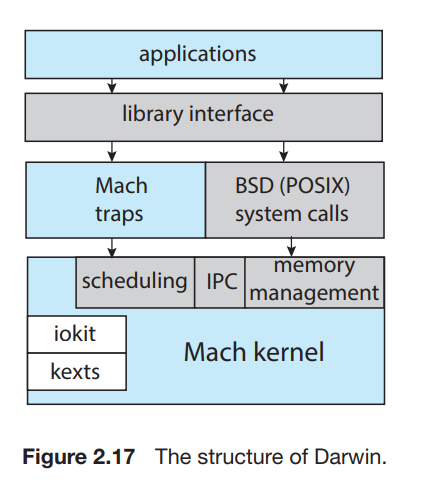 <br>




Darwin is the core kernel environment and is a great example of a hybrid system. It combines the Mach microkernel and the BSD UNIX kernel into a layered, single address space. Its structure includes:

*   **Dual System-Call Interfaces:**
    *   Unlike most OSs that have one system-call interface, Darwin provides two:
        1.  **Mach System Calls** (also known as Mach traps).
        2.  **BSD System Calls** (which provide standard POSIX functionality).
    *   Applications access these calls through a rich set of libraries (C library, networking libraries, etc.).

*   **Mach's Role (The Microkernel Core):**
    *   Mach provides the fundamental OS services:
        *   Memory Management
        *   CPU Scheduling
        *   Interprocess Communication (IPC) via **message passing** and Remote Procedure Calls (RPCs).
    *   Mach uses kernel abstractions like **tasks** (a process), **threads**, and **ports** (for IPC).
    *   Example: When an application uses the BSD `fork()` system call to create a process, Mach internally represents it using its `task` abstraction.

*   **The I/O Kit and Kernel Extensions:**
    *   Darwin provides an **I/O Kit** for developing device drivers.
    *   It supports dynamically loadable modules, which macOS calls **kernel extensions (kexts)**.

##### **Solving the Microkernel Performance Problem**

This is a critical detail. As discussed in Section 2.8.3, a pure microkernel suffers performance overhead because services run in user space, requiring slow message passing and context switches.

**Darwin solves this by not being a pure microkernel.** Instead, it combines **Mach, BSD, the I/O Kit, and all kernel extensions (kexts) into a single address space.** This means:

*   Mach's services (scheduling, memory management) and BSD's services (file systems, networking) all run in kernel space, not as separate user processes.
*   Message passing within Mach still occurs, but because everything is in the same address space, **no data copying is required**, making it extremely fast.
*   The result is a system that has the **modular design benefits** of a microkernel but the **high performance** of a monolithic kernel.

##### **Open Source Status**

*   The **Darwin** operating system is **open source**. This has allowed third-party projects to add features like the X11 windowing system or new file systems.
*   However, the higher-level layers, including the **Cocoa/Cocoa Touch application frameworks** and other proprietary Apple frameworks, are **closed source**.

#### **2.8.5.2 Android**

The Android operating system was created by the Open Handset Alliance, led by Google, for smartphones and tablets. It has two key philosophical differences from iOS:
1.  It is designed to run on a wide variety of hardware from different manufacturers.
2.  It is **open-source**, which has been a major factor in its widespread adoption.

The architecture of Android is a layered software stack, as shown in the diagram.

**Go to Figure 2.18: Architecture of Google’s Android.**


<br> 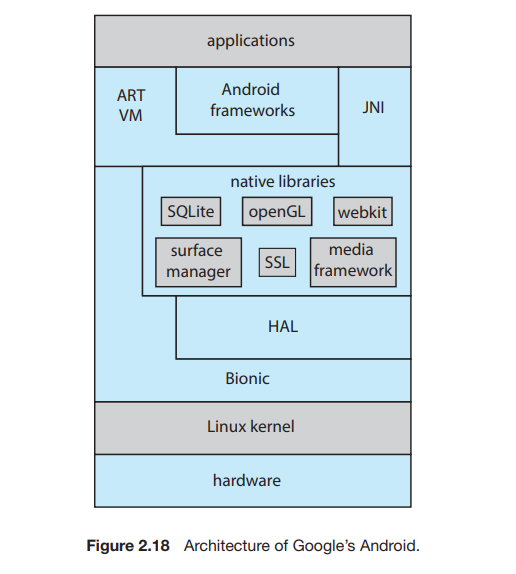 <br>



Let's break down this stack from the top down:

##### **1. Applications**
*   This is the top layer, where all the user-facing apps reside (like the web browser, games, etc.).

##### **2. Android Framework & ART (Android RunTime)**
This layer is crucial for how apps are built and run.

*   **Development Language:** Apps are primarily written in **Java**.
*   **Android API:** However, developers do not use the standard Java API. Google provides a separate **Android API** for Java development.
*   **Android RunTime (ART):** This is the engine that runs the applications. It is a virtual machine (VM), but it is specifically designed for Android and optimized for mobile devices with limited memory and CPU power.
    *   **Compilation Process:**
        1.  Java code is first compiled into a standard Java bytecode (`.class` file).
        2.  This bytecode is then translated into an Android-executable format called a `.dex` (Dalvik Executable) file.
    *   **Ahead-of-Time (AOT) Compilation:** This is a key performance feature. Unlike many Java VMs that use Just-In-Time (JIT) compilation (compiling code as it runs), ART compiles the `.dex` files into **native machine code at the time of app installation**. This allows for:
        *   More efficient application execution.
        *   Reduced power consumption.
        *   Both are critical for mobile battery life.

##### **3. Java Native Interface (JNI)**
*   This is a bridge that allows developers to write Java code that can bypass the ART virtual machine and call **native libraries** written in C/C++ directly.
*   This is used to access specific hardware features or for performance-critical tasks.
*   **Important Caveat:** Programs using JNI are generally **not portable** across different hardware devices, as they are tied to specific low-level code.

##### **4. Native Libraries**
*   This layer contains core C/C++ libraries that provide essential services to the system and apps. Examples include:
    *   **Webkit:** For rendering web pages.
    *   **OpenGL:** For 2D and 3D graphics.
    *   **SQLite:** A lightweight database engine.
    *   **SSL:** For secure network communication.
    *   **Surface Manager:** For composing what different apps draw on the screen.

##### **5. Hardware Abstraction Layer (HAL)**
*   This is a key layer for Android's hardware compatibility. Since Android runs on countless devices, the **HAL** provides a standard interface that abstracts the specific details of the physical hardware (like the camera, GPS, sensors).
*   It allows app developers to talk to a consistent software interface without worrying about the underlying hardware driver. This ensures **application portability** across different devices.

##### **6. Linux Kernel**
*   At the very bottom of the stack is the **Linux kernel**, which provides the core operating system services.
*   However, Google has made significant modifications to the standard Linux kernel to tailor it for mobile needs:
    *   **Power Management:** Enhanced features to conserve battery.
    *   **Memory Management:** Optimized for memory-constrained devices.
    *   **Interprocess Communication (IPC):** Added a new, efficient form of IPC called **Binder** (covered in Section 3.8.2.1).
    *   **Wakelocks:** A mechanism to prevent the device from going to sleep while an app is performing a critical task.

##### **A Special Note: The Bionic C Library**
*   Instead of using the standard GNU C Library (`glibc`) from Linux, Android uses its own library called **Bionic**.
*   Reasons for this include:
    *   **Smaller Memory Footprint:** Designed to be lighter and faster.
    *   **Optimized for Mobile CPUs:** Tuned for the typically slower processors in mobile devices.
    *   **Licensing:** Allows Google to use a more permissive software license than the GPL license used by `glibc`.

#### **Windows Subsystem for Linux (WSL)**

This section describes a feature in Windows 10 that allows it to run native Linux applications. It's a practical example of Windows's hybrid architecture, which uses subsystems to emulate different operating-system environments.

##### **High-Level Overview**

Windows 10 includes the **Windows Subsystem for Linux (WSL)**. This subsystem allows **native Linux applications** (specified as ELF binaries) to run directly on Windows, without the need for a virtual machine.

**How a User Interacts with WSL:**
A user starts the **`bash.exe`** application on Windows. This presents the user with a familiar **bash shell**, but it's running within the WSL environment.

##### **Internal Architecture and Components**

Internally, WSL works by creating a special environment. Here are the key components and how they work together:

1.  **Linux Instance:**
    *   When `bash.exe` is run, WSL creates a **Linux instance**.
    *   This instance starts with the **`init` process** (the traditional first process in Linux), which then creates the **`/bin/bash` shell** process.

2.  **Pico Processes:**
    *   Each of these Linux processes (like `init` and `bash`) runs inside a special Windows container called a **Pico process**.
    *   The Pico process's job is to load the native Linux binary into its address space, creating the environment where the Linux application can execute.

3.  **Kernel Services: LXCore and LXSS:**
    *   These Pico processes communicate with two key Windows kernel services:
        *   **LXCore**
        *   **LXSS** (Linux Subsystem)
    *   The primary job of these services is to **translate Linux system calls** from the running Linux application into something the Windows kernel can understand and execute.

##### **The System Call Translation Process**

This is the core technical challenge that WSL solves. When a Linux application makes a system call, it must be handled by the Windows kernel. The translation happens as follows:

*   **Case 1: Direct Equivalent Exists**
    *   If the Linux system call has a direct, one-to-one equivalent in Windows, the **LXSS service simply forwards the call directly** to the corresponding Windows system call. This is the most efficient path.

*   **Case 2: Similar, but Not Identical, System Calls**
    *   Often, Linux and Windows have system calls that are similar but not exactly the same.
    *   In this situation, **LXSS provides part of the functionality itself** and then invokes the similar Windows system call to complete the operation.

*   **Case 3: No Windows Equivalent**
    *   If a Linux system call has no equivalent in Windows, the **LXSS service must provide the entire functionality itself** to emulate the behavior the Linux application expects.

##### **A Concrete Example: The `fork()` System Call**

The book uses the `fork()` call to illustrate Case 2 (similar but not identical calls).

*   In Linux, `fork()` creates a child process that is an almost identical duplicate of the parent.
*   In Windows, the closest equivalent is `CreateProcess()`, which is designed to create a new process running a different program; it is not built to duplicate an existing process.

**How WSL handles `fork()`:**
1.  The LXSS service does the initial work required for forking.
2.  It then calls the Windows `CreateProcess()` system call to handle the remainder of the work.
3.  By combining its own logic with the native Windows call, it successfully emulates the Linux `fork()` behavior.

**The figure provided illustrates this basic behavior of WSL,** showing the flow from the user-mode `bash.exe` down through the Pico processes and the LXSS/LXCore services to the Windows kernel.

## **2.9 Building and Booting an Operating System**

This section explains how an operating system (OS) is created, configured, and started on a computer. While an OS can be built for one specific machine, it is more common to design it to run on a variety of machines with different hardware components.

---

### **2.9.1 Operating-System Generation**

When you buy a computer, it usually comes with an OS like Windows or macOS already installed. However, there are situations where you need to install or build an OS yourself, such as:
*   Replacing the pre-installed OS.
*   Adding another OS (dual-booting).
*   Using a computer that was sold without an OS.

If you are building an operating system from the beginning, you must follow these five steps:

1.  **Write (or Obtain) the Source Code:** You need the human-readable code that defines the OS. This can be code you write yourself or existing code, like the Linux kernel.
2.  **Configure the OS:** You must adapt the OS for the specific hardware it will run on. Settings are saved in a **configuration file**.
3.  **Compile the OS:** The human-readable source code is translated into machine code that the computer's processor can execute.
4.  **Install the OS:** The compiled OS is placed onto the computer's hard drive or storage device.
5.  **Boot the Computer:** The computer is started, and control is handed over to the newly installed operating system.

**Levels of System Configuration and Generation**

The process of system generation can be done at different levels of customization:

1.  **Full System Build (Most Tailored):**
    *   A system administrator modifies the OS source code directly based on the configuration file.
    *   The entire operating system is then **compiled** from this modified source code.
    *   The result is a completely customized OS built specifically for that exact hardware configuration. This is common for **embedded systems** with static, unchanging hardware.

2.  **Linking Precompiled Modules (Common Compromise):**
    *   The configuration file is used to select necessary parts from a library of **precompiled object modules** (like device drivers for different I/O devices).
    *   These pre-made modules are then **linked together** to form the final OS.
    *   This is faster than a full compile but may result in a larger, more general system than strictly necessary. Most modern OSs for desktops, laptops, and mobile devices use this approach, often with **loadable kernel modules** to add support for new hardware dynamically.

3.  **Modular System (Most Flexible):**
    *   The system is built from modules that are selected and loaded **at execution (run) time**.
    *   System generation here simply involves setting configuration parameters. The system adapts as it runs.

The main differences between these approaches are the **size** of the final OS, its **generality**, and how **easy** it is to change when the hardware changes.

---

**Building a Linux System from Scratch: A Step-by-Step Example**

To illustrate a full system build, here is a typical process for building a Linux kernel:

1.  **Download Source Code:** Get the Linux source code from a site like `http://www.kernel.org`.
2.  **Configure the Kernel:** Run the command `make menuconfig`. This command opens a menu to select which features and drivers to include. Your choices are saved into a file named **`.config`**.
3.  **Compile the Kernel:** Run the `make` command. This command reads the **`.config`** file and compiles the core part of the operating system, producing the kernel image file named **`vmlinuz`**.
4.  **Compile Kernel Modules:** Run the `make modules` command. This compiles the optional, loadable parts of the kernel (the modules), also based on the **`.config`** file.
5.  **Install the Modules:** Run `make modules_install`. This command copies the compiled modules into the correct location so the `vmlinuz` kernel can find and use them.
6.  **Install the New Kernel:** Run `make install`. This command installs the new `vmlinuz` kernel and related files onto the system. When the computer reboots, it will run this new operating system.

---

**Alternative: Using a Virtual Machine**

Instead of replacing your main OS, you can install Linux inside a **virtual machine** (VM). A VM allows you to run an operating system (the "guest") on top of your existing OS (the "host"), such as running Linux on a Windows or macOS computer. (Refer to Section 1.7 and Chapter 18 for more on virtualization).

There are two main ways to do this:

1.  **Build from Scratch in a VM:** The process is similar to the steps above, but you perform them within the virtual machine's environment.
2.  **Use a Pre-built Virtual Machine Appliance:** This is a faster method. You download a ready-to-run OS image (an **appliance**) and install it using virtualization software like **VirtualBox** or **VMware**.

**Example of using a pre-built appliance:**
The authors of the textbook created their provided VM by:
1.  Downloading an **Ubuntu ISO image** (a disk image file) from `https://www.ubuntu.com/`.
2.  Configuring **VirtualBox** to use the downloaded ISO file as a virtual bootable DVD.
3.  Starting (booting) the virtual machine, answering the installation questions, and letting the installer set up the OS inside the VM.

### **2.9.2 System Boot**

This section explains how the computer starts up and loads the operating system kernel into memory after it has been generated and installed. This process is known as **booting**.

---

#### **The Boot Process Overview**

Once the operating system is built, the hardware needs to find and start it. The boot process typically follows these steps:

1.  **Bootstrap Program:** A small program called the **bootstrap program** or **boot loader** finds the kernel on the storage device.
2.  **Load Kernel:** The boot loader loads the kernel into the computer's main memory (RAM) and starts its execution.
3.  **Initialize Hardware:** The kernel takes over and initializes all the hardware components of the computer.
4.  **Mount Root File System:** The kernel mounts the **root file system**, which is the primary directory that contains all the system files and directories.

---

#### **Detailed Boot Process: BIOS vs. UEFI**

Some systems use a **multistage boot process**:

**Traditional BIOS (Basic Input/Output System) Boot:**
*   When the computer powers on, a very small boot loader located in non-volatile firmware called the **BIOS** runs first.
*   This initial loader usually just loads a second, more capable boot loader from a fixed location on the disk called the **boot block**.
*   The code in the boot block is often simple because it must fit in a single disk block. Its main job is to know where to find the rest of the bootstrap program and the operating system kernel.

**Modern UEFI (Unified Extensible Firmware Interface) Boot:**
*   Many newer systems have replaced BIOS with **UEFI**.
*   UEFI has advantages over BIOS, including better support for 64-bit systems and larger disks.
*   A key advantage is that UEFI is a single, complete boot manager, making the boot process faster than the multi-stage BIOS approach.

---

#### **The Role of the Bootstrap Program**

Whether using BIOS or UEFI, the main bootstrap program (like **GRUB** for Linux) performs several critical tasks:
*   **Loads the Kernel:** It finds the file containing the kernel program and loads it into memory.
*   **Runs Diagnostics:** It checks the state of the machine (e.g., inspecting memory, the CPU, and discovering connected devices).
*   **Initializes the System:** It initializes CPU registers, device controllers, and the contents of main memory.
*   **Starts the OS:** It finally starts the operating system's execution and mounts the root file system. Only after this point is the system considered to be **running**.

**GRUB Example:**
GRUB is a common, open-source bootstrap program. Its configuration file, loaded at startup, specifies boot parameters. For example, parameters from a Linux file called `/proc/cmdline` might look like this:
`BOOT_IMAGE=/boot/vmlinuz-4.4.0-59-generic root=UUID=5f2e2232-4e47-4fe8-ae94-45ea749a5c92`
*   `BOOT_IMAGE` specifies the name of the kernel image file to be loaded into memory.
*   `root` specifies the unique identifier (UUID) of the storage partition that contains the root file system.

---

#### **The Linux Boot Process in More Detail**

The Linux boot process involves some specific steps to be efficient:
*   **Compressed Kernel:** The Linux kernel image is stored as a compressed file to save space. It is decompressed *after* being loaded into memory by the boot loader.
*   **Initial RAM File System (initramfs):** The boot loader creates a temporary root file system in RAM called **initramfs**. This temporary file system contains essential drivers and kernel modules needed to access the *real* root file system (which is on a physical disk, not in memory).
*   **Switching Root File Systems:** Once the kernel has started and the necessary drivers from `initramfs` are installed, the kernel switches from the temporary RAM file system to the real root file system on the disk.
*   **Starting Services:** Finally, Linux creates the first process, **`systemd`**, which then starts all other system services (like a web server or database). The system then presents the user with a login prompt.

**Note:** The boot mechanism is tied to the boot loader. This means there are specific versions of boot loaders like GRUB for BIOS and for UEFI, and the firmware (BIOS/UEFI) must know which one to use.

---

#### **Booting on Mobile Systems (e.g., Android)**

The boot process for mobile systems like Android is slightly different from traditional PCs:
*   **Boot Loader:** Android, though Linux-based, does not use GRUB. Vendors provide their own boot loaders, with **LK ("little kernel")** being a common one.
*   **Kernel and initramfs:** Android uses the same compressed kernel image and initial RAM file system as Linux.
*   **Permanent initramfs:** A key difference is that Android *keeps* the `initramfs` as its permanent root file system, whereas Linux discards it after use.
*   **Startup:** After loading the kernel and mounting the root file system (`initramfs`), Android starts the `init` process, creates several services, and then displays the device's home screen.

---

#### **Recovery and Diagnostic Booting**

Most operating systems (Windows, Linux, macOS, iOS, Android) provide a way to boot into a special **recovery mode** or **single-user mode**. This mode is used for:
*   Diagnosing hardware issues.
*   Fixing corrupt file systems.
*   Reinstalling the operating system.

This capability is crucial for troubleshooting problems that prevent the system from booting normally. The following section (2.10) will cover other system issues like software errors and performance problems.

## **2.10 Operating-System Debugging**

**Debugging** is the process of finding and fixing errors in a system, including both hardware and software. It also includes addressing **performance problems**, which are considered a type of bug. Improving performance by identifying and removing bottlenecks is known as **performance tuning**. This section focuses on debugging errors in processes and the operating system kernel, as well as performance issues. Hardware debugging is not covered here.

---

### **2.10.1 Failure Analysis**

When a software component fails, the operating system has methods to capture information about the failure to aid in debugging.

**Debugging User Processes:**

*   **Log Files:** If a user process fails, most operating systems write error information to a **log file**. This alerts system administrators or users about the problem.
*   **Core Dump:** The operating system can also capture the contents of the process's memory at the time of failure. This capture is called a **core dump** (a term from early computing where memory was referred to as "core") and is stored in a file.
*   **Debugger:** Both running programs and saved core dumps can be analyzed using a **debugger**. This tool allows a programmer to examine the code and memory state of the process at the exact moment it failed, helping to identify the root cause.

**Debugging the Operating System Kernel:**

Debugging the kernel is significantly more complex than debugging a user process due to:
*   The kernel's large size and complexity.
*   Its direct control over the hardware.
*   The fact that standard user-level debugging tools are not available or cannot be used.

A kernel failure is known as a **crash**. The procedure for handling a kernel crash is as follows:
1.  **Log Information:** Error information is saved to a log file.
2.  **Crash Dump:** The state of the system's memory is saved to a **crash dump**.

**The Challenge of Kernel Crash Dumps:**
Saving a kernel crash dump is risky. If the crash is due to a failure in the file-system code, the kernel cannot safely save the memory state to a regular file on that potentially corrupted file system.

The solution to this problem is a special technique:
*   A section of the disk is set aside that contains **no file system**. This area is reserved specifically for saving crash dumps.
*   When the kernel detects an unrecoverable error, it writes the entire contents of memory (or at least the parts owned by the kernel) directly to this reserved disk area.
*   When the system reboots, a special process runs. This process gathers the data from the reserved disk area and writes it to a proper **crash dump file** within a file system, where it can be safely analyzed.

This complex strategy is necessary for kernel debugging but is not required for debugging ordinary user-level processes.

### **2.10.2 Performance Monitoring and Tuning**

**Performance tuning** aims to improve system performance by finding and eliminating **processing bottlenecks**. To find these bottlenecks, you must first be able to monitor how the system is performing. Therefore, the operating system must provide ways to measure and display system behavior.

Performance monitoring tools can be characterized in two ways:
1.  **By Scope:** They can provide **per-process** observations or **system-wide** observations.
2.  **By Method:** They use one of two main approaches: **counters** or **tracing**.

---

#### **2.10.2.1 Counters**

Operating systems track activity using a series of **counters**. These counters keep a running tally of events, such as the number of system calls made, the number of disk operations, or the amount of network packets sent.

Here are examples of Linux tools that use counters, categorized by their scope:

**Per-Process Tools (Focus on individual programs):**
*   **`ps`:** Reports static information for a single process or a selected group of processes (e.g., their ID, status, and resource usage).
*   **`top`:** Provides a real-time, continuously updated view of system statistics, with a focus on current processes and their consumption of resources like CPU and memory.

**System-Wide Tools (Focus on the entire system):**
*   **`vmstat`:** Reports virtual memory statistics, providing data about memory, paging, and block I/O.
*   **`netstat`:** Reports statistics for network interfaces and connections.
*   **`iostat`:** Reports I/O (Input/Output) usage and statistics for disks and other storage devices.

**The `/proc` File System in Linux**

Most counter-based tools on Linux systems get their data from the **`/proc`** file system.
*   `/proc` is a **"pseudo" file system**; it does not exist on a physical disk. It is created dynamically by the kernel in memory when the system boots.
*   Its primary purpose is to provide an interface for querying various **per-process** and **kernel** statistics.
*   It is organized as a directory hierarchy. Each running process has a subdirectory named after its unique Process ID (PID). For example, the directory `/proc/2155` contains all the statistical information for the process with the ID 2155.
*   There are also entries in `/proc` for various **kernel statistics**.

(Refer to Figure 2.19 for the Windows 10 task manager).

**Windows Performance Monitoring**

Windows systems provide the **Windows Task Manager**. This tool offers information on:
*   Current applications
*   Running processes
*   CPU usage
*   Memory usage
*   Networking statistics

The Windows Task Manager is a graphical tool that provides counter-based monitoring similar to the Linux command-line tools.



### **2.10.2 Performance Monitoring and Tuning**

**Performance tuning** aims to improve system performance by finding and eliminating **processing bottlenecks**. To find these bottlenecks, you must first be able to monitor how the system is performing. Therefore, the operating system must provide ways to measure and display system behavior.

Performance monitoring tools can be characterized in two ways:
1.  **By Scope:** They can provide **per-process** observations or **system-wide** observations.
2.  **By Method:** They use one of two main approaches: **counters** or **tracing**.

---

#### **2.10.2.1 Counters**

Operating systems track activity using a series of **counters**. These counters keep a running tally of events, such as the number of system calls made, the number of disk operations, or the amount of network packets sent.

Here are examples of Linux tools that use counters, categorized by their scope:

**Per-Process Tools (Focus on individual programs):**
*   **`ps`:** Reports static information for a single process or a selected group of processes (e.g., their ID, status, and resource usage).
*   **`top`:** Provides a real-time, continuously updated view of system statistics, with a focus on current processes and their consumption of resources like CPU and memory.

**System-Wide Tools (Focus on the entire system):**
*   **`vmstat`:** Reports virtual memory statistics, providing data about memory, paging, and block I/O.
*   **`netstat`:** Reports statistics for network interfaces and connections.
*   **`iostat`:** Reports I/O (Input/Output) usage and statistics for disks and other storage devices.

**The `/proc` File System in Linux**

Most counter-based tools on Linux systems get their data from the **`/proc`** file system.
*   `/proc` is a **"pseudo" file system**; it does not exist on a physical disk. It is created dynamically by the kernel in memory when the system boots.
*   Its primary purpose is to provide an interface for querying various **per-process** and **kernel** statistics.
*   It is organized as a directory hierarchy. Each running process has a subdirectory named after its unique Process ID (PID). For example, the directory `/proc/2155` contains all the statistical information for the process with the ID 2155.
*   There are also entries in `/proc` for various **kernel statistics**.

(Refer to Figure 2.19 for the Windows 10 task manager).


<br> 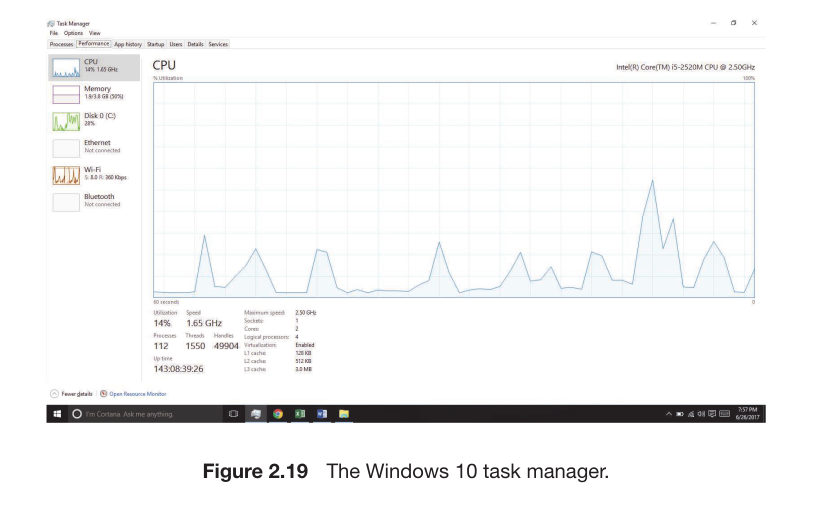 <br>



**Windows Performance Monitoring**

Windows systems provide the **Windows Task Manager**. This tool offers information on:
*   Current applications
*   Running processes
*   CPU usage
*   Memory usage
*   Networking statistics

The Windows Task Manager is a graphical tool that provides counter-based monitoring similar to the Linux command-line tools.

### **2.10.3 Tracing**

Tracing is a different approach from using counters. While counter-based tools simply check the current value of statistics the kernel keeps, **tracing** tools collect detailed data about **specific events** as they happen. This allows you to see the step-by-step execution, for example, of a system-call invocation.

Here are examples of Linux tracing tools, categorized by their scope:

**Per-Process Tools (Focus on individual programs):**
*   **`strace`:** Traces the **system calls** made by a process. It shows each call to the kernel and its result.
*   **`gdb`:** The GNU Debugger. This is a **source-level debugger** that allows a programmer to step through a program's execution line by line, examine variables, and analyze its logic.

**System-Wide Tools (Focus on the entire system):**
*   **`perf`:** A comprehensive collection of Linux performance tools that can trace a wide variety of CPU and system-related events.
*   **`tcpdump`:** A powerful command-line tool that captures and analyzes **network packets** passing through the system.

---

**Kernighan’s Law**

The text highlights a famous principle in computer science:
**“Debugging is twice as hard as writing the code in the first place. Therefore, if you write the code as cleverly as possible, you are, by definition, not smart enough to debug it.”**

This law emphasizes that writing clear and understandable code is crucial. Overly complex or "clever" code becomes extremely difficult to fix when problems arise.

---

**Modern Tracing Tools**

Making operating systems easier to understand, debug, and tune is an active area of development. A new generation of tools has made significant progress. One such toolkit is **BCC (BPF Compiler Collection)**, which is used for **dynamic kernel tracing** in Linux. It allows for sophisticated and efficient tracing and analysis of the kernel's behavior in real-time.

### **2.10.4 BCC**

Debugging the interactions between **user-level code** and **kernel code** is extremely difficult without a specialized toolset. For a toolset to be truly useful for this task, it must meet several demanding requirements:
*   It must be able to debug **any area** of the system, including parts not originally written with debugging in mind.
*   It must perform this debugging **without affecting system reliability**.
*   It must have a **minimal performance impact**. Ideally, it should have **no impact when not in use**, and the impact during use should be proportional to the amount of data being collected.

The **BCC toolkit** is designed to meet these requirements, providing a **dynamic, secure, and low-impact** debugging environment.

---

#### **What is BCC?**

**BCC (BPF Compiler Collection)** is a rich toolkit that provides advanced tracing features for Linux systems. BCC acts as a **front-end interface** to a powerful underlying technology called **eBPF (extended Berkeley Packet Filter)**.

**The Foundation: eBPF**
*   The original **BPF (Berkeley Packet Filter)** technology was developed in the early 1990s for filtering network traffic.
*   **eBPF (extended BPF)** is a modern version that added many new features, transforming it from a simple packet filter into a general-purpose, in-kernel virtual machine.
*   Programs for eBPF are written in a restricted subset of the **C programming language** and are compiled into special **eBPF bytecode instructions**.
*   This eBPF bytecode can be **dynamically inserted into a running Linux kernel** without needing to reboot or load kernel modules.
*   eBPF instructions can be used to capture specific events (like a particular system call being invoked) or to monitor system performance (like measuring the time required for disk I/O).
*   To ensure safety and stability, all eBPF programs are passed through a **verifier** before they are inserted into the kernel. This verifier checks the code to ensure it will not crash the kernel, create infinite loops, or compromise system security.

---

#### **How BCC Simplifies eBPF**

Although eBPF is powerful, writing programs directly using its C interface has traditionally been very difficult. **BCC was created to solve this problem** by providing a simpler, higher-level front-end interface in **Python**.

The structure of a BCC tool is as follows:
1.  The main tool is written in **Python**.
2.  This Python code **embeds C code** that interfaces with the eBPF instrumentation.
3.  The embedded C code, in turn, interfaces directly with the kernel.
4.  The BCC tool automatically **compiles the C program into eBPF instructions** and inserts it into the kernel using techniques like **probes** or **tracepoints**, which are methods for hooking into specific events in the Linux kernel.

---

#### **Using Pre-Built BCC Tools**

Writing custom BCC tools is complex, but the BCC package (which is installed on the provided Linux virtual machine) comes with many ready-to-use tools that monitor various areas of a running kernel.

**Example: `disksnoop.py`**
This tool traces disk I/O activity. Entering the command `./disksnoop.py` generates output like this:

```
TIME(s)            T    BYTES    LAT(ms)
1946.29186700      R       8        0.27
1946.33965000      R       8        0.26
1948.34585000      R    8192        0.96
1950.43251000      W    4096        0.56
1951.74121000      R    4096        0.35
```

This output provides detailed information for each I/O operation:
*   **TIME(s):** The timestamp when the operation occurred.
*   **T:** The type of operation (Read or Write).
*   **BYTES:** The number of bytes involved in the I/O operation.
*   **LAT(ms):** The duration, or latency, of the I/O operation in milliseconds.

**Targeted Tracing**
BCC tools can be focused on specific applications or processes. For example, the command `./opensnoop -p 1225` will trace only the `open()` system calls made by the process with the Process ID **1225**. Many BCC tools are also designed for specific applications like MySQL databases, Java, and Python programs.

---

#### **The Power of BCC**

What makes BCC especially powerful is that its tools can be safely used on **live production systems** that are running critical applications. This allows system administrators to monitor system performance in real-time to identify bottlenecks or security exploits **without causing harm to the system**.

(Refer to Figure 2.20 for an illustration of the wide range of tools provided by BCC and eBPF, showing their ability to trace essentially any area of the Linux operating system.)




<br> 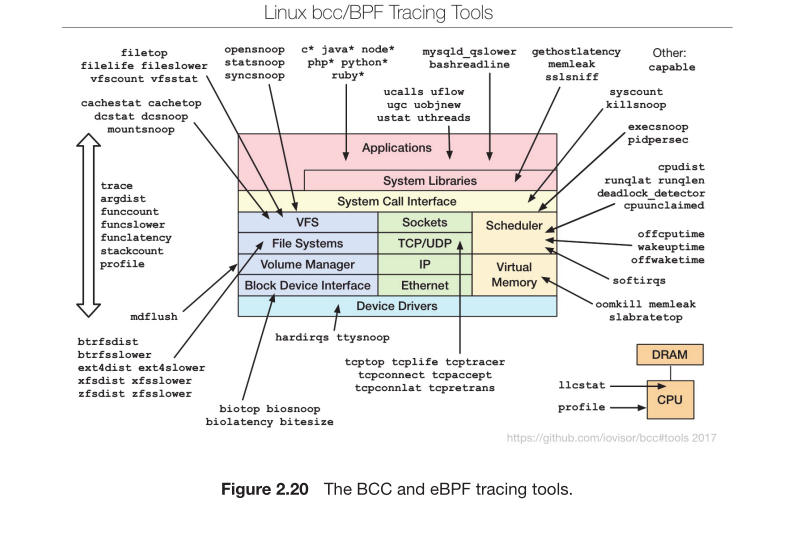 <br>



BCC is a rapidly evolving technology, with new tools and features being added constantly.

## **2.11 Summary**

*   An **operating system** provides an environment for program execution by offering services to both users and programs.

*   There are three primary ways to interact with an operating system:
    1.  **Command Interpreters** (CLI - Command-Line Interface)
    2.  **Graphical User Interfaces** (GUI)
    3.  **Touch-Screen Interfaces**

*   **System calls** provide the interface to the services made available by the operating system. Programmers use a system call's **Application Programming Interface (API)** to access these services.

*   System calls can be divided into six major categories:
    1.  **Process Control**
    2.  **File Management**
    3.  **Device Management**
    4.  **Information Maintenance**
    5.  **Communications**
    6.  **Protection**

*   The standard **C library** provides the system-call interface for UNIX and Linux systems.

*   Operating systems include a collection of **system programs** that provide utilities to users.

*   A **linker** combines several relocatable object modules into a single binary executable file. A **loader** then loads this executable file into memory, where it becomes eligible to run on an available CPU.

*   Applications are **operating-system specific** for several reasons, including:
    *   Different binary formats for program executables.
    *   Different instruction sets for different CPUs.
    *   System calls that vary from one operating system to another.

*   An operating system is designed with specific **goals** in mind. These goals determine the operating system's **policies**, which are implemented through specific **mechanisms**.

*   A **monolithic operating system** has no internal structure; all functionality is provided in a single, static binary file that runs in a single address space. Its primary benefit is efficiency, but it is difficult to modify.

*   A **layered operating system** is divided into a number of discrete layers. The bottom layer is the hardware interface, and the highest layer is the user interface. This approach is generally not ideal for operating systems due to performance problems.

*   The **microkernel** approach uses a minimal kernel, with most services running as user-level applications. Communication takes place via **message passing**.

*   A **modular** approach provides operating-system services through modules that can be loaded and removed during run time. Many contemporary operating systems are **hybrid** systems, using a combination of a monolithic kernel and modules.

*   A **boot loader** loads the operating system into memory, performs initialization, and begins system execution.

*   Operating system performance can be monitored using two main methods:
    *   **Counters:** A collection of system-wide or per-process statistics.
    *   **Tracing:** Following the execution of a program through the operating system to see each step.